## **CS 418 - Group 8 - Impact of Pandemic on Job Growth/Decline in all Sectors**

### Group Name: **Group Ate**
### Group Members: **Saahil, Saahi, Brian, Michelle, Dawid**
Github Repository Link: [CS 418 - Group 8 Github Link](https://github.com/djbiel2/418Final)

Project Introduction: an introduction that discusses the data and related problems that you are investigating.



*   The COVID pandemic created a major shift in the World’s economy and significantly accelerated job growth and decline in certain sectors, some of which were temporary and others permanent. Our problem is the following, to understand which sectors grew and which sectors declined on a country wide scale (USA) as a result of the pandemic. In order to find our answers we will look towards populous cities across the US, such as Chicago and Los Angeles, and indentify which sectors grew and which ones fell. We will also aim to look at national data to see the overall trends pertaining to the US as a whole.

* Some of the data sources we took information from include, the Chicago Data Portal and the Bureau of Labor Statistics. We started with the Chicago Data Portal and the data on the overtime billed by different city departments in 2020 and in 2022. We then decided to use these and focus on the average billed rate to get a good idea of which departments and specific job titles were working the most during the pandemic and post pandemic.



Any Changes Since The Proposal:  a discussion whether your scope has changed
since the check-in proposal slides. List the parts that were removed from your plan as well as the parts that were added newly in your plan

-

Data: Explain how you have prepared your data

- Visualization 1: The Average Overtime Billing Rate of Chicago City Departments in 2020 and 2022
** Member Responsible: Saahi Arumilli
** Utilizes data from the Chicago Data Portal. I pulled the overtime billing of every Chicago city employee in the years 2020 and then in 2022. After this I had to change some column names to keep the frames consistent but also unqiue so I could differentiate between the 2020 and 2022 data. I ended up having to concatenate the frames for both years to make one large frame. I then used the pandas melt function to create the bar graph below.

- Visualization 2: Top 5 Jobs in Chicago City Departments which Billed More Overtime on Average in 2020 than in 2022
** Member Responsible: Saahi Arumilli
** For this data I used the existing data I pulled from visualization 1 but isolated the 7 categories which out performed in 2020 than in 2022. I then decided on using group by to group the data by the department. I then added up the sum of the total of each individuals overtime billed based on their job title. After this I extracted the top 5 jobs from each of the 7 sectors and merged them together to create a larger frame. This larger frame was then used to create a bar plot showing the top 5 highest overtime paying jobs in the 7 categories.

- Visualization 3: Total Employment for the 21 Super Sectors Acknowledged by the Bureau of Labor Statistics
** Member Responsible: Saahi Arumilli
** Firstly I downloaded files from the Bureau of Labor Statistics using their one screen tool. This gave me all 21 supersectors in their own individual xlsx files. After that I had to remove all the header information present on the document one by one. I then added a total column using google sheets by using the =SUM(col1:col2) formula. After this I saved the files as csv's so that I could use the pandas read_csv() function. After this I added a column to each super sector category to tell me which one the data belonged to if I was going to create a visualization which required me to merge all 21 tables into 1 large frame. Due to experimentalization of figuring out which plot would best describe the results, it took quite a bit of time to format the data to the desired format.

- Visualization 4:
** Member Responsible: Brian Li
** First I used the Bureau of Labor Statistics to grab the subsectors of the supersectors that were interesting. Four of the chosen supersectors saw strong growth and surpassed their 2019 employment, while two of the supersectors were unable to employ more than their 2019 mark. Upon retrieving each subsector, I cleaned up extra rows in the files, and created a new column for annual totals. I then read the updated csv files, and applied some code to them. Essentially the code grabs the 2019 employment, and calculates the relative change of every year in the csv.



- Visualization 5:
** Member Responsible: Dawid Biel
** Unemployed persons by industry, class of worker, and sex country wide. https://www.bls.gov/cps/cps_aa2019.htm
** I downloaded 4 csv files from the Bureau of Labor Statistics, one for each year from 2019 through 2022 so that we could have a visual representation of the changes in the unemploment.
** The files needed to be cleaned up since each file also had the previous year's data. I made sure that each row's description matched so that I can simply add more columns and add the data to one spreadsheet. It all matched and I succesfully copied it into one.
** The importance of this data is that it shows the trend over 5 years in each industry and further broken down by class of worker and sex.
The visualization that I focused on was the overall unemployment change  from 2019 to 2022 based on different industries.
** I did that to fit our parameters. I wanted to take a year prior to the Pandemic and compare it to 2022.
So far the the only result is the overall change, but I would like to make further graphs depicting the 5 year trend for each category and based on sex.
The reason for that is because even though the general trend might show one direction, there might be more revealed about smaller trends if we break it down further.

- Visualization 6:
** Member Responsible: Saahi Arumilli
** For this visualization I first researched the top 10 most populous states in the US. I looked at this link https://www.britannica.com/topic/largest-U-S-state-by-population and found the states that fit my decided scope. I then went to the Bureau of Labor Statistics website and used their One Screen tool to access the total nonfarm employment data from the 10 states with seasonal adjustments. I then downloaded xlsx files and had to clear the headers for all 10 files. After that I created a total column using the excel formula =SUM(). After this I saved all the files as CSV's and proceeded to creating my visualization.

- ML Analysis 1:
** Member Responsible: Saahil Sorakayala
** For this analysis the data for Visualization 1 was analyzed to predict the changes in overtime billing between 2020 and 2022. There were 3 models, (linear regression, logistic regression, and SVC) used in order to compare which model would be suitable for predicting an increase or a decrease in overtime billing. I used the same data from the Chicago Data Portal.
Then I calculated the total for each department, merged the data into one dataframe, and created the features based on the difference between the totals, and the labels based on if the difference between the totals was positive or negative. These were input into the 3 models, and then compared the results.


- ML Analysis 2:
** Member Responsible: Michelle Zhou
**


Exploratory Data Analysis - explain what your data looks like (visualizations are often better). Include any interesting issues or preliminary conclusions you have about your data.   At least five visualizations - that shows an interesting hypothesis, along with an explanation about why you thought this was an interesting hypothesis to Investigate. Write the name of the member(s) who is responsible for each of them while explaining it.

- Below you will find our visualizations.

In [ ]:
%pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Visualization 1: Average Billed Overtime For Chicago City Departments in 2020 & 2022
## Group Member Responsible: Saahi Arumilli

In [ ]:
%cd "/content/drive/MyDrive/CS 418 - Project"
!pwd

In [ ]:
# Visualization 1: Reading Data
# Member Responsible: Saahi Arumilli
chi_data = pd.read_csv('Chicago_City_Employment_Data_20240223.csv')
over2020_data = pd.read_csv('Employee_Overtime_and_Supplemental_Earnings_2020_20240223.csv')

# https://data.cityofchicago.org/Administration-Finance/Current-Employee-Names-Salaries-and-Position-Title/xzkq-xp2w/data_preview
# https://data.cityofchicago.org/d/njrn-3hws/visualization
# https://data.cityofchicago.org/d/2vpk-jv3c/visualization

#over2020_data.head()

over2022_data = pd.read_csv('Employee_Overtime_and_Supplemental_Earnings_2022_20240223.csv')
over2022_data['DEPARTMENT NAME'] = over2022_data['DEPARTMENT NAME'].str.upper()
#over2022_data.head()

Text(0.5, 1.0, 'Average Billed Overtime for Chicago City Departments in 2020 & 2022')

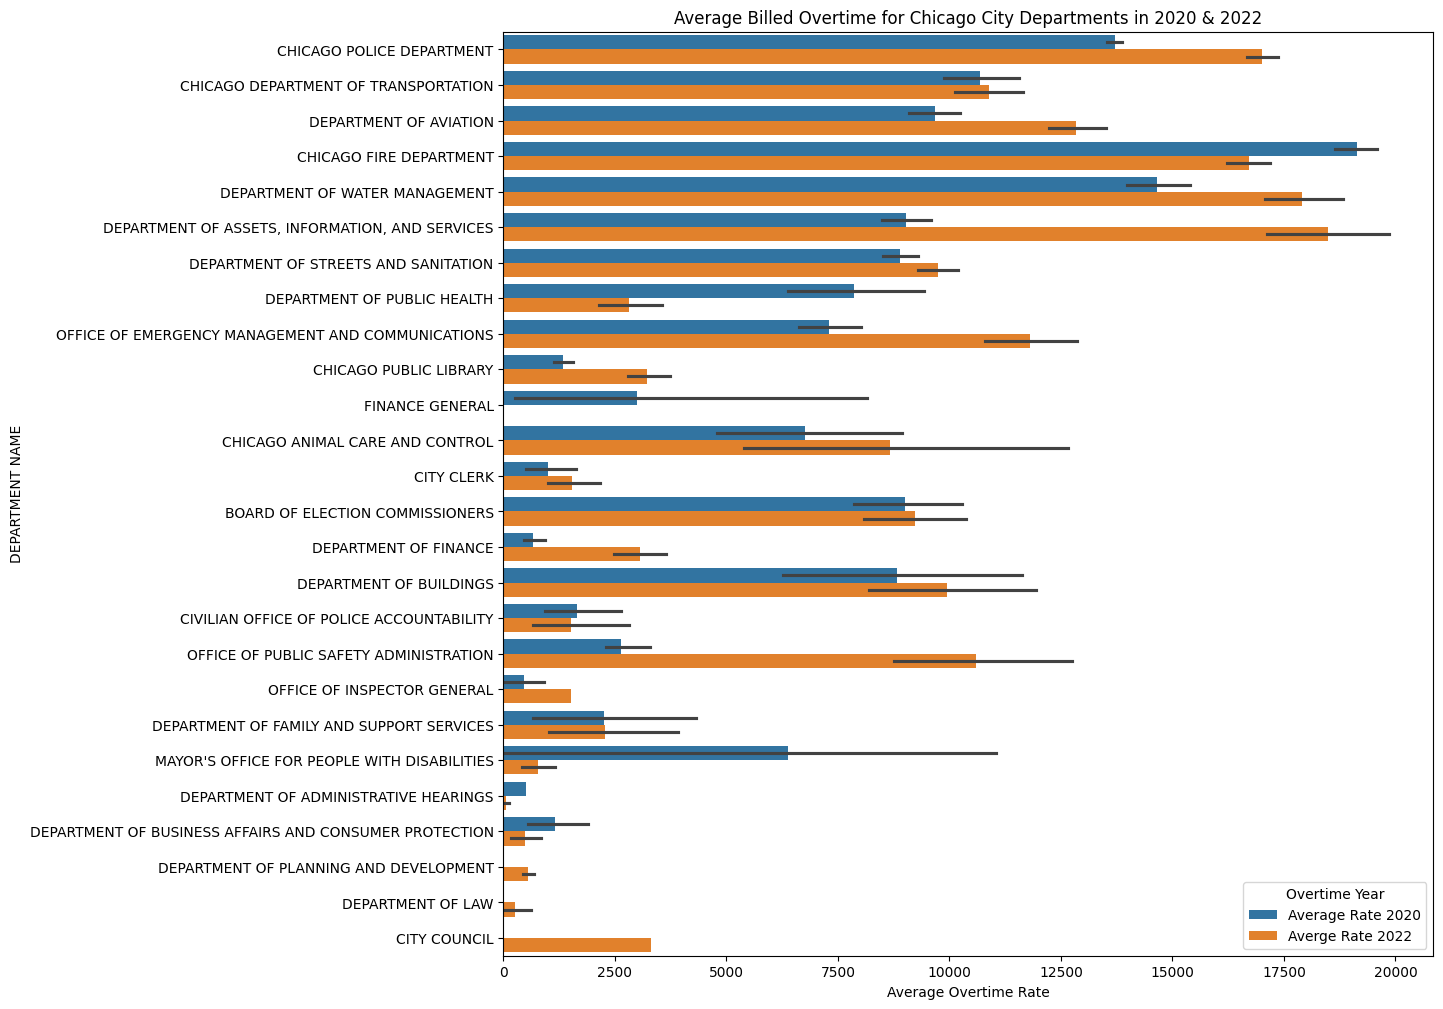

In [ ]:
# Visualization 1: Average Overtime Billed by Different Chicago City Departments in 2020 versus in 2022
# Member Responsible: Saahi Arumilli
over2022_data.rename(columns={'TOTAL': 'Averge Rate 2022'}, inplace=True)
over2020_data.rename(columns={'TOTAL': 'Average Rate 2020'}, inplace=True)

# Data Concatenation
plt.figure(figsize=(12, 12))
otFrame = [over2020_data, over2022_data]

resultFrame = pd.concat(otFrame)
resultFrame.head()

# print(len(over2020_data.axes[0]))
# print(len(over2022_data.axes[0]))
# print(len(resultFrame.axes[0]))
resultFrame.columns

# Melt the data
melted_data = pd.melt(resultFrame, id_vars=['DEPARTMENT NAME'], value_vars=['Average Rate 2020', 'Averge Rate 2022'], var_name='Overtime Year', value_name='Average Overtime Rate')


#sns.barplot(x='DEPARTMENT NAME', y='Average Overtime', hue='Overtime Year' , data=melted_data)
sns.barplot(x='Average Overtime Rate', y='DEPARTMENT NAME', hue='Overtime Year' , data=melted_data)
plt.title("Average Billed Overtime for Chicago City Departments in 2020 & 2022")
#sns.barplot(x='Total 2022', y='DEPARTMENT NAME', data=melted_data)


## Visualization 1 Explanation:
>> In this visualization you can find the average overtime billed by different Chicago city departments in 2020 and in 2022. This visualization is great to see which categories were performing better during the period of the pandemic and which ones were performing better during the post pandemic period. We found some interesting results from this visualization.
*   The first noteworthy point to highlight is that there were 7 categories which performed better during the pandemic than post pandemic. These include, the fire department, department of public health, and the financial general just to name a few. Most of the departments related to either health, business, or some sort of social services.




# Visualization 2: The Top 5 Jobs of Chicago City Departments which Billed More Overtime in 2020 than in 2022
## Group Member Responsible: Saahi Arumilli

In [ ]:
# Visualization 2
# Member Responsible: Saahi Arumilli
# The 7 departments that billed higher overtime in 2020 than they did in 2022
# Extracting the top 5 job titles that billed the most overtime in 2020
  # CHICAGO FIRE DEPARTMENT
fireFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "CHICAGO FIRE DEPARTMENT"]
fireSeries = (fireFrame['Average Rate 2020'].groupby(fireFrame['TITLE']).sum()).sort_values(ascending=False)
top5Fire = fireSeries[:5]

  # DEPARTMENT OF PUBLIC HEALTH
healthFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "DEPARTMENT OF PUBLIC HEALTH"]
healthSeries = (healthFrame['Average Rate 2020'].groupby(healthFrame['TITLE']).sum()).sort_values(ascending=False)
top5Health = healthSeries[:5]

  # FINANCIAL GENERAL
financeFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "FINANCIAL GENERAL"]
financeSeries = (financeFrame['Average Rate 2020'].groupby(financeFrame['TITLE']).sum()).sort_values(ascending=False)
top5Finance =financeSeries[:5]

  # CIVILIAN OFFICE OF POLICE ACCOUNTABILITY
policeAccFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "CIVILIAN OFFICE OF POLICE ACCOUNTABILITY"]
policeSeries = (policeAccFrame['Average Rate 2020'].groupby(policeAccFrame['TITLE']).sum()).sort_values(ascending=False)
top5Police = policeSeries[:5]

  # MAYOR'S OFFICE FOR PEOPLE WITH DISABILITIES
mayorsFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "MAYOR'S OFFICE FOR PEOPLE WITH DISABILITIES"]
mayorsSeries = (mayorsFrame['Average Rate 2020'].groupby(mayorsFrame['TITLE']).sum()).sort_values(ascending=False)
top5Mayor = mayorsSeries[:5]

  # DEPARTMENT OF ADMINISTRATIVE HEARINGS
adminFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "DEPARTMENT OF ADMINISTRATIVE HEARINGS"]
adminSeries = (adminFrame['Average Rate 2020'].groupby(adminFrame['TITLE']).sum()).sort_values(ascending=False)
top5Admin = adminSeries[:5]

  # DEPARTMENT OF BUSINESS AFFAIRS AND CONSUMER PROTECTION
businessFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "DEPARTMENT OF BUSINESS AFFAIRS AND CONSUMER PROTECTION"]
businessSeries = (businessFrame['Average Rate 2020'].groupby(businessFrame['TITLE']).sum()).sort_values(ascending=False)
top5Business = businessSeries[:5]


In [ ]:
# Visualization 2
# # Member Responsible: Saahi Arumilli
# top5Fire top5Admin top5Business top5Mayor top5Police top5Health top5Finance
# Add the department name for the visualization
# Add a column to each series to indicate their department name

# Only need to run the below commented code once
top5Fire = top5Fire.to_frame()
top5Health = top5Health.to_frame()
top5Finance = top5Finance.to_frame()
top5Police =top5Police.to_frame()
top5Mayor = top5Mayor.to_frame()
top5Admin = top5Admin.to_frame()
top5Business = top5Business.to_frame()

top5Fire.loc[:,'Department Name'] = pd.Series('Fire Department', index=top5Fire.index)
top5Health.loc[:,'Department Name'] = pd.Series('Department of Health', index=top5Health.index)
top5Finance.loc[:,'Department Name'] = pd.Series('Financial General', index=top5Finance.index)
top5Police.loc[:,'Department Name'] = pd.Series('Civilian Office of Police Accountability', index=top5Police.index)
top5Mayor.loc[:,'Department Name'] = pd.Series('Mayor\'s Office for People with Disabilities', index=top5Mayor.index)
top5Admin.loc[:,'Department Name'] = pd.Series('Department of Administrative Hearings', index=top5Admin.index)
top5Business.loc[:,'Department Name'] = pd.Series('Department of Business Affairs and Consumer Protection', index=top5Business.index)
print(top5Fire)

                   Average Rate 2020  Department Name
TITLE                                                
FIREFIGHTER-EMT          21124039.84  Fire Department
LIEUTENANT-EMT           11849728.09  Fire Department
PARAMEDIC I/C             8790839.26  Fire Department
FIRE ENGINEER-EMT         8367870.45  Fire Department
CAPTAIN-EMT               6208323.36  Fire Department


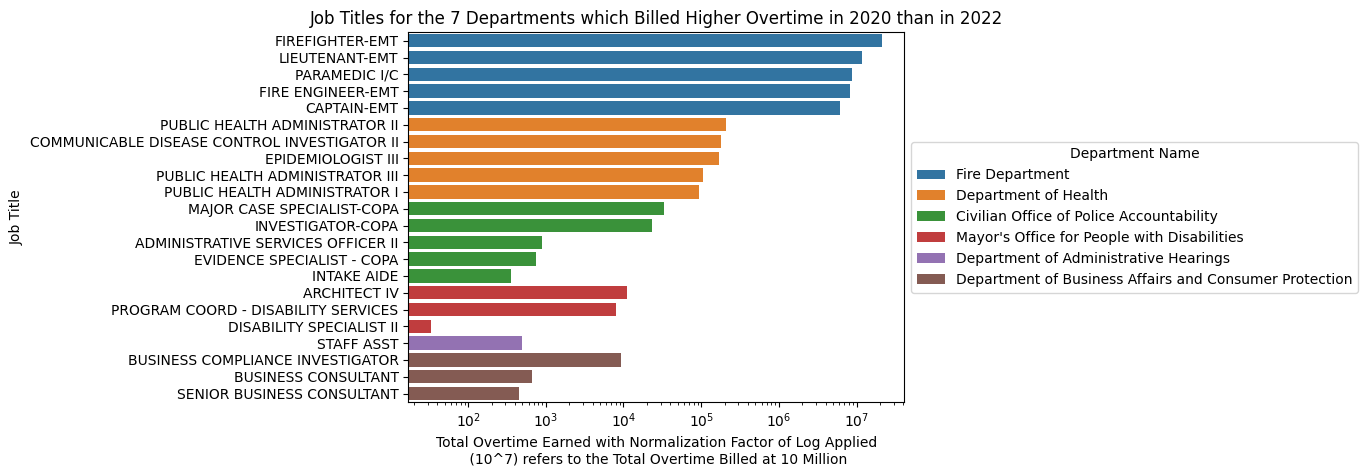

In [ ]:
# Visualization 2: Top 5 Jobs of Departments Which Billed Higher Overtime in 2020 than in 2022
# Member Responsible: Saahi Arumilli
topFrame = [top5Fire, top5Health, top5Finance, top5Police, top5Mayor, top5Admin, top5Business]
top5Frame = pd.concat(topFrame)
plt.xscale('log')
#print(top5Frame)

otPlot = sns.barplot(x='Average Rate 2020', y='TITLE', hue='Department Name' , data=top5Frame)
otPlot.set(xlabel='Total Overtime Earned with Normalization Factor of Log Applied\n (10^7) refers to the Total Overtime Billed at 10 Million', ylabel="Job Title", title="Job Titles for the 7 Departments which Billed Higher Overtime in 2020 than in 2022")
plt.legend(title= 'Department Name', loc='center left', bbox_to_anchor=(1, 0.5))

## Visualization 2 Explanation:
>> After seeing the first visualization I was curious to see just how much over time the 7 categories which performed better in terms of over time billing in 2020 than in 2022. I took the 7 categories and created a bar chart with the color of the bar representing the department they belong to. In this I will mention that I had to apply a normalization to be able to show the values of the overtime billed. I used a log normalization on the graphs x axis. To put this in perspective the highest billed overtime belonged to a Fire Fighter EMT and their title billed over 21 million in 2020. Thus the x axis ticks will tell us the rough figure amount billed by the jobs.
* Once again we noticed that within these 7 categories that the highest performers were EMT's, public health officials like administrators and CDC and other health officials. After that there were more general job titles like business consultants.
* Based on the nature of the pandemic we can understand the need for medical personnel and other health care experts but it was surprising to see business consultants and business compliance investigators on this list.

# Visualization 3 -
## Group Member Responsible: Brian Li

In [ ]:
%cd "./Final Files/"
!pwd

/content/drive/.shortcut-targets-by-id/1vHUQNFw7whQPPjPmJSEVvPrI2ThZlcZ3/CS 418 - Project/Final Files
/content/drive/.shortcut-targets-by-id/1vHUQNFw7whQPPjPmJSEVvPrI2ThZlcZ3/CS 418 - Project/Final Files


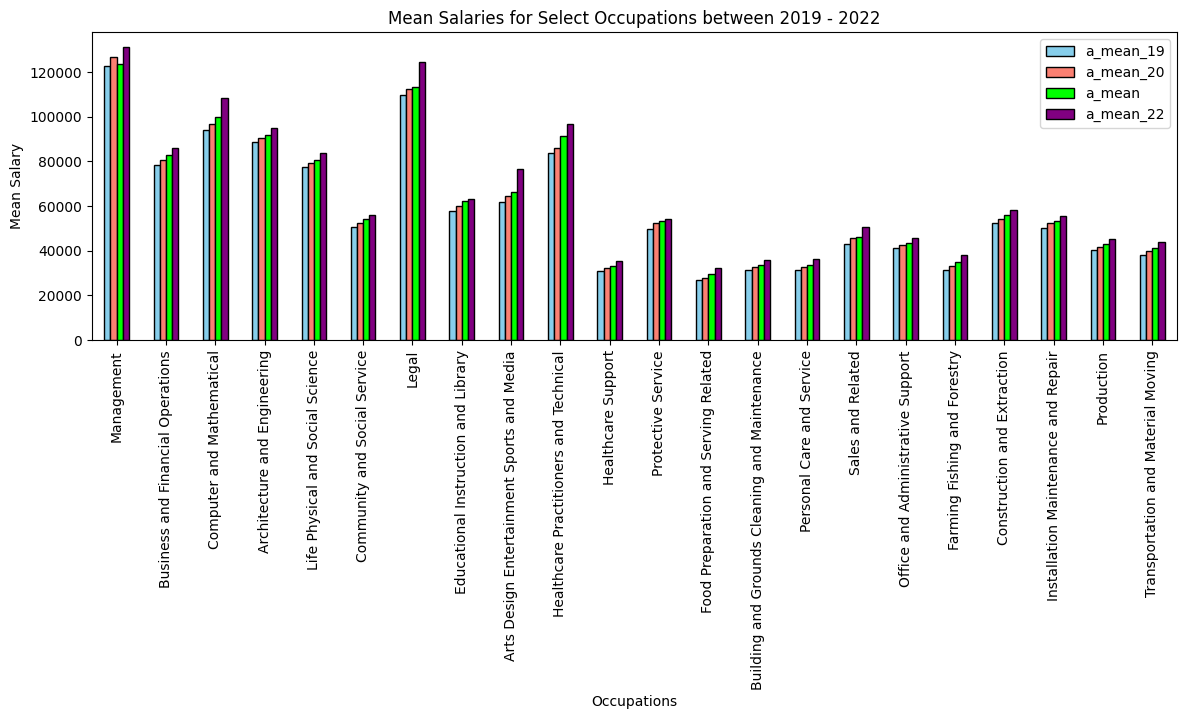

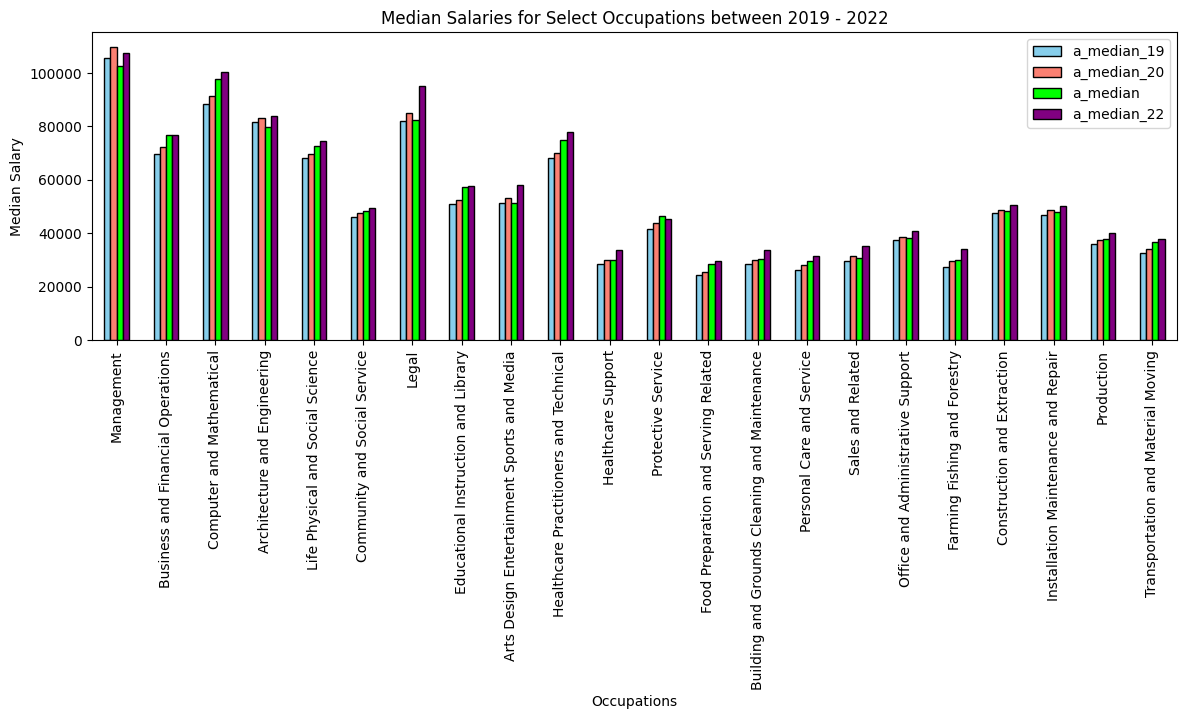

In [ ]:
nat2019 = pd.read_csv('national_M2019_dl.csv')
nat2020 = pd.read_csv('national_M2020_dl.csv')
nat2021 = pd.read_csv('national_M2021_dl.csv')
nat2022 = pd.read_csv('national_M2022_dl.csv')

csvarr = [nat2019, nat2020, nat2021, nat2022]


for i in range(4):
  csvarr[i].columns = csvarr[i].columns.str.lower()
  condition = csvarr[i]['occ_code'].str[-4:] == '0000'
  csvarr[i] = csvarr[i][condition]
  csvarr[i] = csvarr[i][['occ_title', 'tot_emp', 'h_mean', 'a_mean', 'a_pct10', 'a_pct25', 'a_median', 'a_pct75', 'a_pct90']]
  csvarr[i]['occ_title'] = csvarr[i]['occ_title'].str.replace(' Occupations', '')
  csvarr[i] = csvarr[i].drop(index = 0)
  for column in csvarr[i].columns:
    csvarr[i][column] = csvarr[i][column].str.replace(',', '')
    csvarr[i][column] = csvarr[i][column].str.replace('#', '0')
    if (column != 'occ_title'):
      csvarr[i][column] = csvarr[i][column].astype(float)
  if (i == 3):
    merged_df = csvarr[0].merge(csvarr[1], on='occ_title', suffixes=('_19', '_20'))
    merged_df = merged_df.merge(csvarr[2], on='occ_title', suffixes=(None, '_21'))
    merged_df = merged_df.merge(csvarr[3], on='occ_title', suffixes=(None, '_22'))
    meanplt = merged_df.plot.bar(title= "Mean Salaries for Select Occupations between 2019 - 2022", x='occ_title', y=['a_mean_19', 'a_mean_20', 'a_mean', 'a_mean_22'], color=['skyblue', 'salmon', 'lime', 'purple'], edgecolor='black', figsize=(14,4), xlabel='Occupations', ylabel='Mean Salary')
    medianplt = merged_df.plot.bar(title= "Median Salaries for Select Occupations between 2019 - 2022", x='occ_title', y=['a_median_19', 'a_median_20', 'a_median', 'a_median_22'], color=['skyblue', 'salmon', 'lime', 'purple'], edgecolor='black', figsize=(14,4), xlabel='Occupations', ylabel='Median Salary')
    plt.show()
    # meanplt.title("Mean Salaries for Select Occupations between 2019 - 2022")
    # plt.title("Mean Salaries for Select Occupations between 2019 - 2022")





## Visualization 3 Explanation:
>> This visualization shows the 21 super sectors from the national data pulled from the Bureau of Labor Statistics. This visual shows us the data for employment from 2019 - 2022. From this we are able to see some strong performers which came out stronger by the end of 2022 than they were in 2019 pre pandemic. These include
* construction, financial activities, goods producing, information, non durable goods, private service providing, professional business services, service providing, trade transportation and utilities, transportation warehousing, utilities, and wholesale.


# Visualization 4: Specific Subsectors of Super Sectors which out Performed their Pre Pandmic Level of Employment
## Group Member Responsible: Brian Li

Text(0.5, 1.0, 'Relative change in Professional Business Service subsectors compared to 2019')

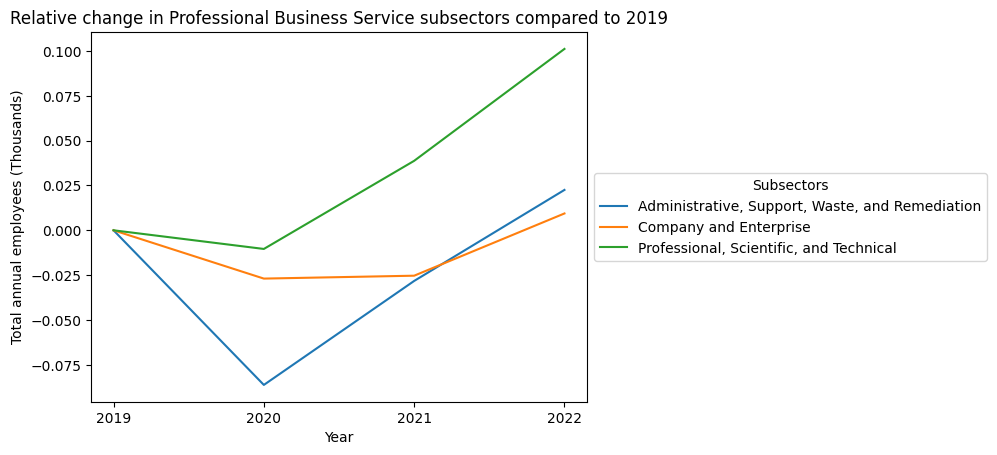

In [ ]:
# Visualization 4: Subsectors of Super Sectors which Showed more Growth Post Pandemic than Pre Pandemic
# Member Responsible: Brian Li

# Make sure directory is pointing to "/Final Files"

# Professional Business Services supersector
file_prefix = "./ProfessionalBusinessServices_Subsectors/"
aswr = pd.read_csv(file_prefix + "Administrative,Support,Waste,Remediation.csv")
company_enterprise = pd.read_csv(file_prefix + "CompanyOrEnterpriseManagement.csv")
pst = pd.read_csv(file_prefix + "Professional,Scientific,Technical.csv")

aswr.loc[:,'subsectors'] = pd.Series(1, index=aswr.index)
company_enterprise.loc[:,'subsectors'] = pd.Series(2, index=company_enterprise.index)
pst.loc[:,'subsectors'] = pd.Series(3, index=pst.index)

aswr_2019 = aswr.iloc[0]["Total"]
comp_ente_2019 = company_enterprise.iloc[0]["Total"]
pst_2019 = pst.iloc[0]["Total"]

aswr["Total"] = aswr["Total"].apply(lambda x: (x - aswr_2019) / aswr_2019)
company_enterprise["Total"] = company_enterprise["Total"].apply(lambda x: (x - comp_ente_2019) / comp_ente_2019)
pst["Total"] = pst["Total"].apply(lambda x: (x - pst_2019) / pst_2019)

sns.lineplot(data=aswr, x="Year", y="Total")
sns.lineplot(data=company_enterprise, x="Year", y="Total")
sns.lineplot(data=pst, x="Year", y="Total")

ax = plt.gca()
ax.lines[0].set_label('Administrative, Support, Waste, and Remediation')
ax.lines[1].set_label('Company and Enterprise')
ax.lines[2].set_label("Professional, Scientific, and Technical")

ax.set_ylabel("Total annual employees (Thousands)")
ax.set_xticks(aswr["Year"])
ax.legend(title="Subsectors", loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Relative change in Professional Business Service subsectors compared to 2019")


Text(0.5, 1.0, 'Relative change in Healthcare and Social assistance subsectors compared to 2019')

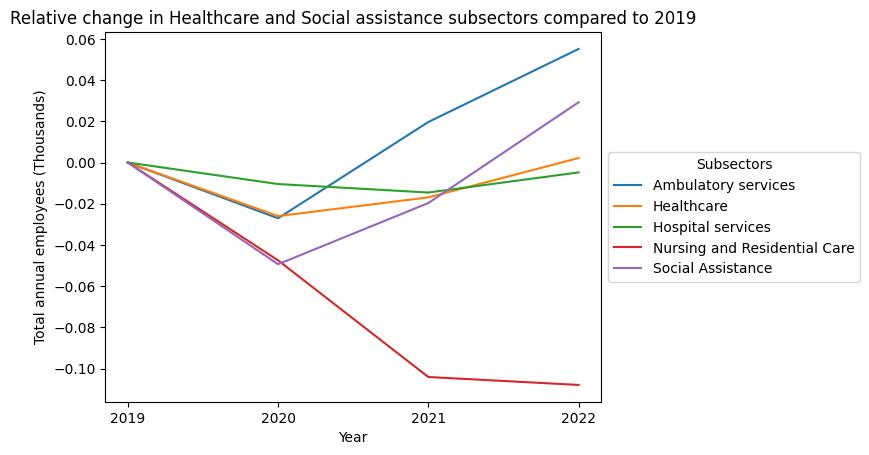

In [ ]:
# Vis 4 Continued
# Healthcare & Social assistance supersector
file_prefix = "./Healthcare_Subsectors/"
ambulatory = pd.read_csv(file_prefix + "AmbulatoryHealthCareServices.csv")
healthcare = pd.read_csv(file_prefix + "Healthcare.csv")
hospitals = pd.read_csv(file_prefix + "Hospitals.csv")
nursing_residential = pd.read_csv(file_prefix + "Nursing&ResidentialCare.csv")
social_ast = pd.read_csv(file_prefix + "SocialAssistance.csv")

df_list = []
df_list.append(ambulatory)
df_list.append(healthcare)
df_list.append(hospitals)
df_list.append(nursing_residential)
df_list.append(social_ast)

list_2019 = []
for i in range(len(df_list)):
    df_list[i].loc[:,'subsectors'] = pd.Series(i, index=ambulatory.index)
    list_2019.append(df_list[i].iloc[0]["Total"])
    df_list[i]["Total"] = df_list[i]["Total"].apply(lambda x: (x - list_2019[i]) / list_2019[i])
    sns.lineplot(data=df_list[i], x="Year", y="Total")

ax = plt.gca()
ax.lines[0].set_label('Ambulatory services')
ax.lines[1].set_label('Healthcare')
ax.lines[2].set_label("Hospital services")
ax.lines[3].set_label("Nursing and Residential Care")
ax.lines[4].set_label("Social Assistance")

ax.set_ylabel("Total annual employees (Thousands)")
ax.set_xticks(ambulatory["Year"])
ax.legend(title="Subsectors", loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Relative change in Healthcare and Social assistance subsectors compared to 2019")

Text(0.5, 1.0, 'Relative change in Information subsectors compared to 2019')

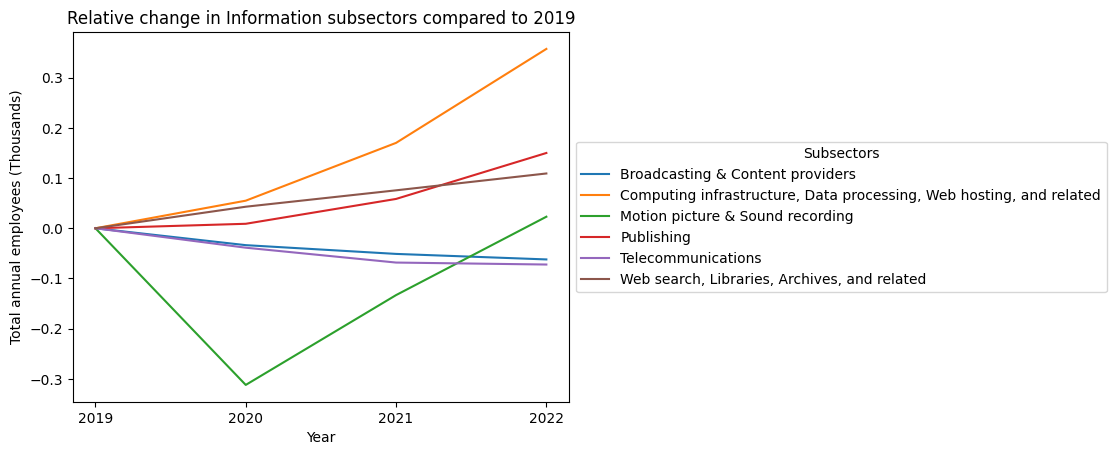

In [ ]:
# Vis 4 Continued
# Information supersector
file_prefix = "./Information_Subsectors/"
broadcasting = pd.read_csv(file_prefix + "Broadcasting&ContentProviders.csv")
computing = pd.read_csv(file_prefix + "ComputingInfrastructure,DataProcessing,WebHosting,related.csv")
motion_pic = pd.read_csv(file_prefix + "MotionPicture&SoundRecording.csv")
publishing = pd.read_csv(file_prefix + "Publishing.csv")
telecom = pd.read_csv(file_prefix + "Telecommunications.csv")
web_search = pd.read_csv(file_prefix + "WebSearch,Libraries,Archives,related.csv")


df_list = []
df_list.append(broadcasting)
df_list.append(computing)
df_list.append(motion_pic)
df_list.append(publishing)
df_list.append(telecom)
df_list.append(web_search)

list_2019 = []
for i in range(len(df_list)):
    df_list[i].loc[:,'subsectors'] = pd.Series(i, index=broadcasting.index)
    list_2019.append(df_list[i].iloc[0]["Total"])
    df_list[i]["Total"] = df_list[i]["Total"].apply(lambda x: (x - list_2019[i]) / list_2019[i])
    sns.lineplot(data=df_list[i], x="Year", y="Total")

ax = plt.gca()
ax.lines[0].set_label("Broadcasting & Content providers")
ax.lines[1].set_label("Computing infrastructure, Data processing, Web hosting, and related")
ax.lines[2].set_label("Motion picture & Sound recording")
ax.lines[3].set_label("Publishing")
ax.lines[4].set_label("Telecommunications")
ax.lines[5].set_label("Web search, Libraries, Archives, and related")


ax.set_ylabel("Total annual employees (Thousands)")
ax.set_xticks(ambulatory["Year"])
ax.legend(title="Subsectors", loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Relative change in Information subsectors compared to 2019")

Text(0.5, 1.0, 'Relative change in Transporation & Warehousing subsectors compared to 2019')

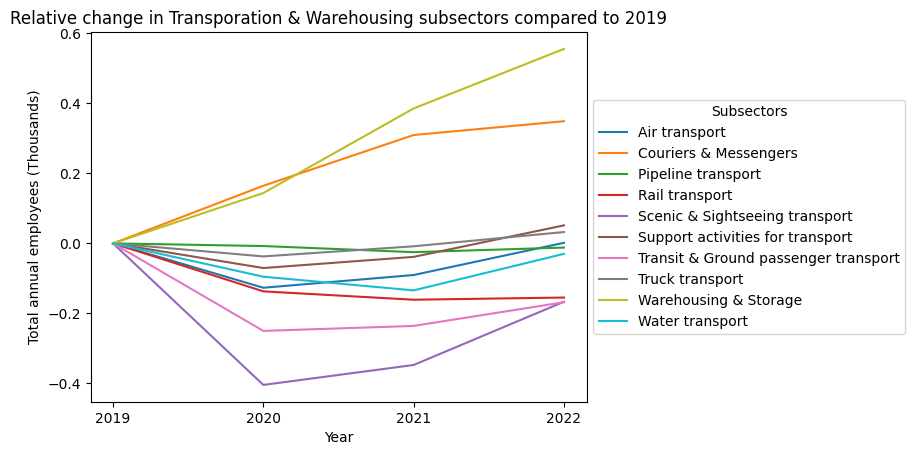

In [ ]:
# Vis 4 continued
# Transportation & Warehousing supersector
file_prefix = "./Transportation_Warehousing_Subsectors/"
air = pd.read_csv(file_prefix + "AirTransport.csv")
couriers = pd.read_csv(file_prefix + "Couriers&Messengers.csv")
pipeline = pd.read_csv(file_prefix + "PipelineTransport.csv")
rail = pd.read_csv(file_prefix + "RailTransport.csv")
scenic = pd.read_csv(file_prefix + "Scenic&SightseeingTransport.csv")
support_activities = pd.read_csv(file_prefix + "SupportActivitiesForTransport.csv")
transit = pd.read_csv(file_prefix + "Transit&GroundPassengerTransport.csv")
truck = pd.read_csv(file_prefix + "TruckTransport.csv")
warehousing_storage = pd.read_csv(file_prefix + "Warehousing&Storage.csv")
water = pd.read_csv(file_prefix + "WaterTransport.csv")


df_list = []
df_list.append(air)
df_list.append(couriers)
df_list.append(pipeline)
df_list.append(rail)
df_list.append(scenic)
df_list.append(support_activities)
df_list.append(transit)
df_list.append(truck)
df_list.append(warehousing_storage)
df_list.append(water)

list_2019 = []
for i in range(len(df_list)):
    df_list[i].loc[:,'subsectors'] = pd.Series(i, index=air.index)
    list_2019.append(df_list[i].iloc[0]["Total"])
    df_list[i]["Total"] = df_list[i]["Total"].apply(lambda x: (x - list_2019[i]) / list_2019[i])
    sns.lineplot(data=df_list[i], x="Year", y="Total")

ax = plt.gca()
ax.lines[0].set_label("Air transport")
ax.lines[1].set_label("Couriers & Messengers")
ax.lines[2].set_label("Pipeline transport")
ax.lines[3].set_label("Rail transport")
ax.lines[4].set_label("Scenic & Sightseeing transport")
ax.lines[5].set_label("Support activities for transport")
ax.lines[6].set_label("Transit & Ground passenger transport")
ax.lines[7].set_label("Truck transport")
ax.lines[8].set_label("Warehousing & Storage")
ax.lines[9].set_label("Water transport")


ax.set_ylabel("Total annual employees (Thousands)")
ax.set_xticks(ambulatory["Year"])
ax.legend(title="Subsectors", loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Relative change in Transporation & Warehousing subsectors compared to 2019")

Text(0.5, 1.0, 'Relative change in Retail trade subsectors compared to 2019')

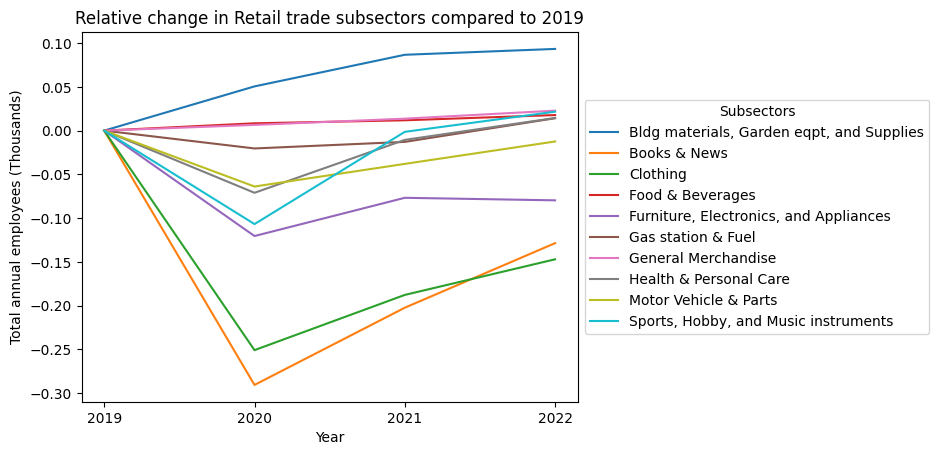

In [ ]:
# Vis 4 continued
# The next 2 supersectors failed to match or exceed their mark in 2019 by 2022
# Retail trade supersector
file_prefix = "./Retail_Trade_Subsectors/"
bldg_mats = pd.read_csv(file_prefix + "BldgMaterials&GardenEqpt&Supplies.csv")
books_news = pd.read_csv(file_prefix + "Books&News.csv")
clothing = pd.read_csv(file_prefix + "ClothingFashion.csv")
food_bev = pd.read_csv(file_prefix + "Food&Bev.csv")
furniture = pd.read_csv(file_prefix + "Furniture&Electronics&Appliances.csv")
fuel = pd.read_csv(file_prefix + "GasStation&Fuel.csv")
general_merch = pd.read_csv(file_prefix + "GeneralMerchandise.csv")
health_personalcare = pd.read_csv(file_prefix + "Health&PersonalCare.csv")
vehicle_parts = pd.read_csv(file_prefix + "MotorVehicle&Parts.csv")
sports = pd.read_csv(file_prefix + "Sports&Hobby&MusicInstrument.csv")

df_list = []
df_list.append(bldg_mats)
df_list.append(books_news)
df_list.append(clothing)
df_list.append(food_bev)
df_list.append(furniture)
df_list.append(fuel)
df_list.append(general_merch)
df_list.append(health_personalcare)
df_list.append(vehicle_parts)
df_list.append(sports)

list_2019 = []
for i in range(len(df_list)):
    df_list[i].loc[:,'subsectors'] = pd.Series(i, index=air.index)
    list_2019.append(df_list[i].iloc[0]["Total"])
    df_list[i]["Total"] = df_list[i]["Total"].apply(lambda x: (x - list_2019[i]) / list_2019[i])
    sns.lineplot(data=df_list[i], x="Year", y="Total")

ax = plt.gca()
ax.lines[0].set_label("Bldg materials, Garden eqpt, and Supplies")
ax.lines[1].set_label("Books & News")
ax.lines[2].set_label("Clothing")
ax.lines[3].set_label("Food & Beverages")
ax.lines[4].set_label("Furniture, Electronics, and Appliances")
ax.lines[5].set_label("Gas station & Fuel")
ax.lines[6].set_label("General Merchandise")
ax.lines[7].set_label("Health & Personal Care")
ax.lines[8].set_label("Motor Vehicle & Parts")
ax.lines[9].set_label("Sports, Hobby, and Music instruments")


ax.set_ylabel("Total annual employees (Thousands)")
ax.set_xticks(ambulatory["Year"])
ax.legend(title="Subsectors", loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Relative change in Retail trade subsectors compared to 2019")

Text(0.5, 1.0, 'Relative change in Leisure & Hospitality subsectors compared to 2019')

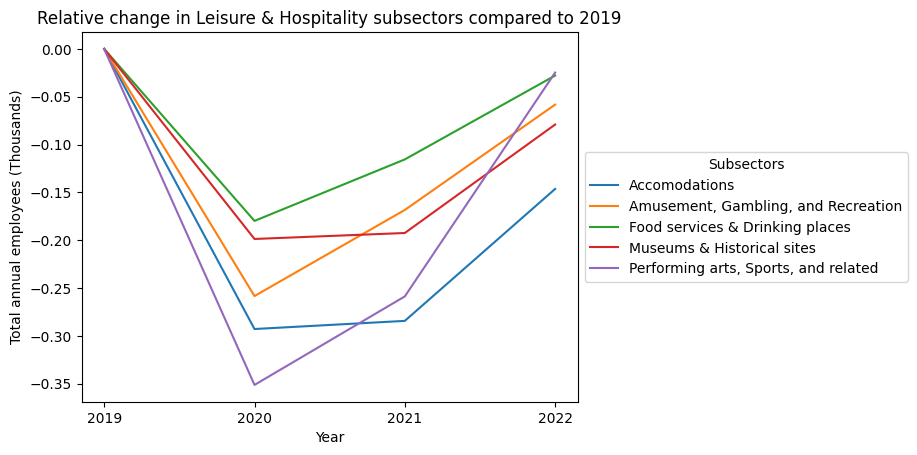

In [ ]:
# Vis 4 continued
# Leisure and Hospitality supersector
file_prefix = "./Leisure_Hospitality_Subsectors/"
accomodation = pd.read_csv(file_prefix + "Accomodation.csv")
amusement = pd.read_csv(file_prefix + "Amusement&Gambling&Recreation.csv")
food_services = pd.read_csv(file_prefix + "FoodServices&DrinkingPlaces.csv")
museums = pd.read_csv(file_prefix + "Museums&HistoricalSites.csv")
performing_arts = pd.read_csv(file_prefix + "PerformingArts&Sports&Related.csv")

df_list = []
df_list.append(accomodation)
df_list.append(amusement)
df_list.append(food_services)
df_list.append(museums)
df_list.append(performing_arts)

list_2019 = []
for i in range(len(df_list)):
    df_list[i].loc[:,'subsectors'] = pd.Series(i, index=air.index)
    list_2019.append(df_list[i].iloc[0]["Total"])
    df_list[i]["Total"] = df_list[i]["Total"].apply(lambda x: (x - list_2019[i]) / list_2019[i])
    sns.lineplot(data=df_list[i], x="Year", y="Total")

ax = plt.gca()
ax.lines[0].set_label("Accomodations")
ax.lines[1].set_label("Amusement, Gambling, and Recreation")
ax.lines[2].set_label("Food services & Drinking places")
ax.lines[3].set_label("Museums & Historical sites")
ax.lines[4].set_label("Performing arts, Sports, and related")



ax.set_ylabel("Total annual employees (Thousands)")
ax.set_xticks(ambulatory["Year"])
ax.legend(title="Subsectors", loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Relative change in Leisure & Hospitality subsectors compared to 2019")

## Visualization 4 Explanation:
Professional Business Services: This supersector saw the largest growth of 5.5% from its 2019 employment.
Starting at 256 million in 2019 to 270 million 2022. From the visualization, we can see that
professional, scientific, and technical service subsector lead the growth, increasing by 10%.
The other 2 subsectors grew between 0-1%.

Healthcare & Social Assistance: This supersector was interesting because we are looking at employment during and after a pandemic.
IThis sector surprisingly did not grow much, but it also saw the least loss in employment from 2019 to 2020.
Looking into it more closely, we can see that nursing and residential care employment took a 10% hit, while ambulatory services
increased by 6%. Other subsectors saw between a -0.5% to 3% change.

Information:
This supersector saw growth so we decided to look into which subsectors were a main part of that growth.
The subsector that saw the largest growth of 4% was "Computing infrastructure, data processing, web hosting, and related" industries.
Two other subsectors grew by 1%, one dropped and returned to its 2019 mark, and the last two decreased by 0.5%.

Transportation and Warehousing: This supersector saw growth as well, so we looked into its subsectors.
Overall, employment in subsectors related to public transportation (3) saw a decline and were unable to bounce back.
Five subsectors saw a decline and were able to bounce back to their 2019 levels. The strongest subsectors, "Warehousing & Storage" saw growth
of 6%, and "Couriers & Messengers" saw growth of ~4%

Retail Trade:
This supersector saw a decline and bounced back to its 2019 levels so we decided to look into the contributing subsectors.
From our visualization, the only subsector that saw growth was "Building materials, garden equipment, and supplies". This
subsector grew by 10%, while 6 other subsectors returned to their 2019 levels. "Furniture, Electronics, and Appliances" saw a 10% drop,
and "Clothing" + "Books & News" saw a 15% drop.

Leisure and Hospitality:
This supersector saw a decline of 5% from 2019 to 2022, which we thought was interesting as well.
Unlike the other sectors, all subsectors in this supersector were unable to meet or surpass their 2019 mark. This shows us
that the weakest sector during a pandemic are related to Leisure and Hospitality. The best performers that had a 5% loss
in employment are "Performing Arts, Sports, and related" and "Food services and Drinking places". "Museums & Historical Sites" saw
a 10% loss, and "Gambling & Recreational" saw a 8% loss. The worst performer ending with 15% loss being "Accomodations".

# Visualization 5: ENTER TITLE
## Group Member Responsible: Saahil Sorakayala

In [ ]:
# Visualization 5
# Member Responsible: Saahil Sorakayala

# Cleaning data
unemployment_change_2021_data = pd.read_csv('2021_States_Unemployment_Change.csv')
unemployment_change_2023_data = pd.read_csv('2023_States_Unemployment_Change.csv')

# delete unnecessary rows
del unemployment_change_2021_data['2020 rate']
del unemployment_change_2021_data['Change']
del unemployment_change_2021_data['Rank']

del unemployment_change_2023_data['2022 rate']
del unemployment_change_2023_data['Change']
del unemployment_change_2023_data['Rank']

# sort by state name ascending
sorted2021 = unemployment_change_2021_data.sort_values(by=['State'], ascending=True)
sorted2023 = unemployment_change_2023_data.sort_values(by=['State'], ascending=True)
sorted2021 = sorted2021.reset_index(drop=True)
sorted2023 = sorted2023.reset_index(drop=True)

# Merge the dataframes
merged_df = pd.merge(sorted2021, sorted2023, on='State', how='inner')

# Find the difference between 2020 rate and 2023 rate
merged_df['Difference'] = merged_df['2023 rate'] - merged_df['2021 rate']

# Plotting bar chart
plt.figure(figsize=(12, 8))
plt.bar(merged_df['State'], merged_df['Difference'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Difference in Unemployment Rate (2023 - 2021)')
plt.title('Difference in Unemployment Rate (2023 - 2021) by State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Visualization 5 Explanation: This bar chart shows the unemployment rate of each of the 50 US states. The y-axis represents the differential between 2021 and 2023. These represent the start of the covid pandemic and the end of the covid pandemic. The conclusion that can be made from these results is that all states experienced a lower rate of unemployment by the end of the pandemic. This means that more people became employed by 2023, the end of the pandemic.


# Visualization 6: ENTER TITLE
## Group Member Responsible: Saahil Sorakayala

## Visualization 6 Explanation:

# Visualization 7: ENTER TITLE
## Group Member Responsible: Michelle Zhou

## Visualization 7 Explanation:

# Visualization 8: ENTER TITLE
## Group Member Responsible: Michelle Zhou

An error occurred: Can only use .str accessor with string values!
An error occurred: Can only use .str accessor with string values!
An error occurred: Can only use .str accessor with string values!
An error occurred: Can only use .str accessor with string values!
An error occurred: Can only use .str accessor with string values!
An error occurred: Can only use .str accessor with string values!
An error occurred: Can only use .str accessor with string values!
An error occurred: Can only use .str accessor with string values!
An error occurred: Can only use .str accessor with string values!
An error occurred: Can only use .str accessor with string values!
An error occurred: Can only use .str accessor with string values!


ValueError: No objects to concatenate

## Visualization 8 Explanation:

# Visualization 9: (Insert Title)
## Group Member Responsible: Dawid Biel

<ipython-input-2-aa43338a46f8>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='% Change 2019-2022', y='Industry and class of worker', data=data_sorted, palette='viridis')


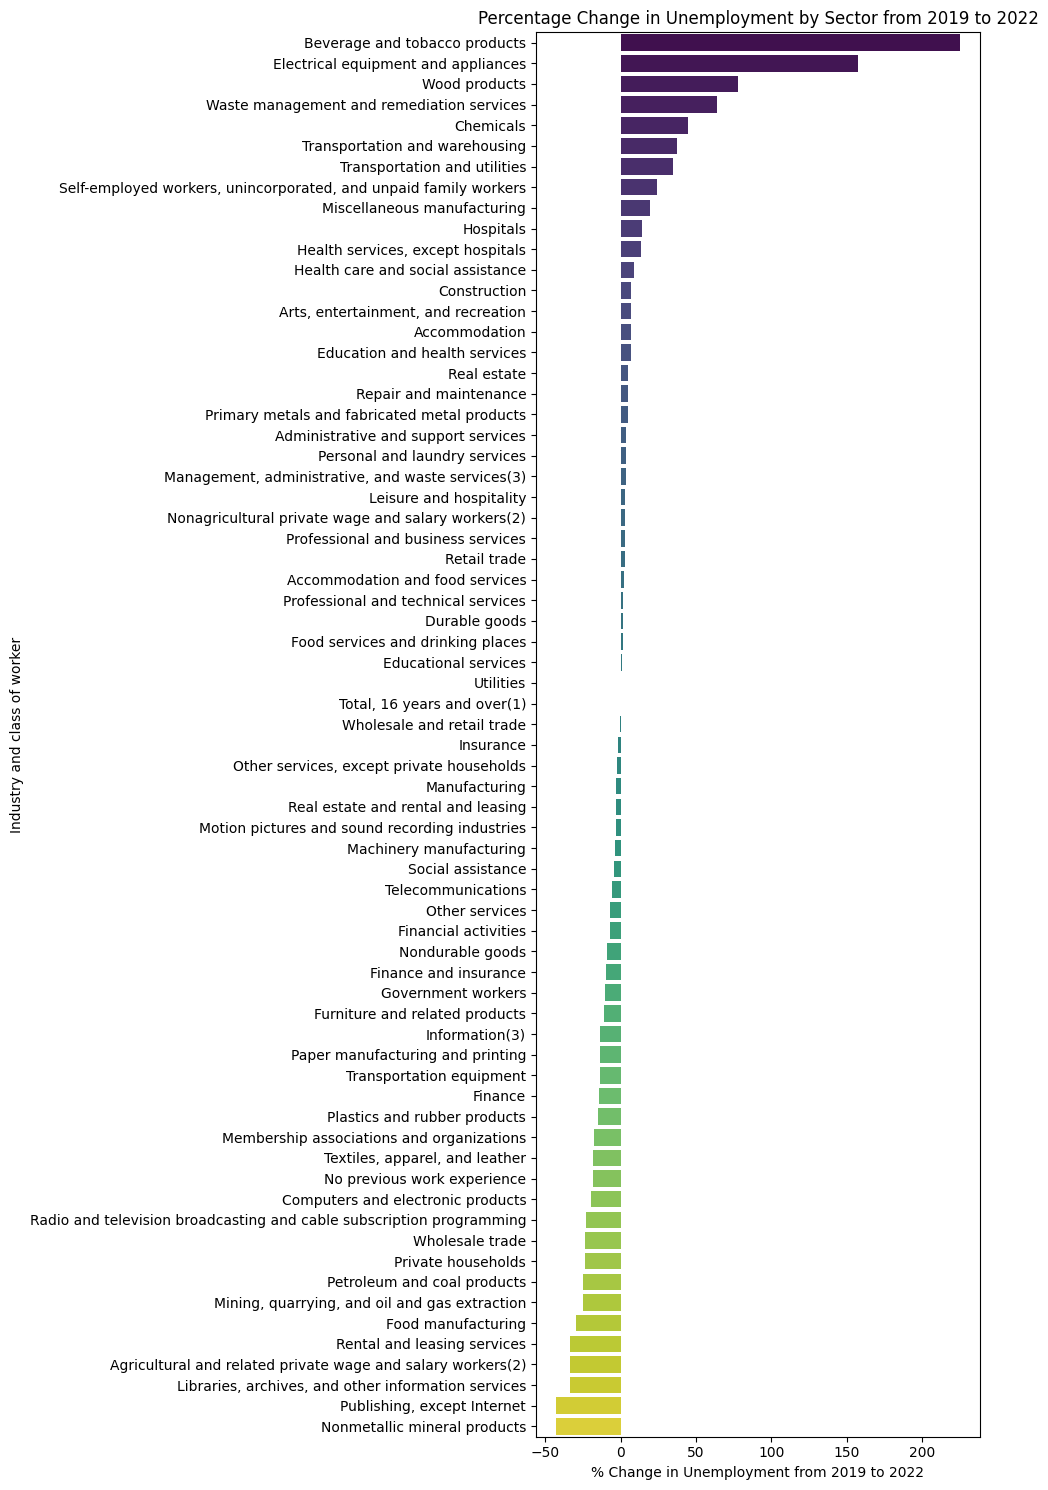

In [ ]:
# Visualization 5:
# Member Responsible: Dawid Biel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/sample_data/2018to2022Unemploymentdata.xlsx'
data = pd.read_excel(file_path, skiprows=3)

data = data.dropna(subset=['Unnamed: 0'])
data = data.rename(columns={
    'Unnamed: 0': 'Industry and class of worker',
    'Unnamed: 1': 'Unemployed 2018',
    'Unnamed: 2': 'Unemployed 2019',
    'Unnamed: 3': 'Unemployed 2020',
    'Unnamed: 4': 'Unemployed 2021',
    'Unnamed: 5': 'Unemployed 2022',
})

columns_of_interest = ['Industry and class of worker', 'Unemployed 2018', 'Unemployed 2019', 'Unemployed 2020',
                       'Unemployed 2021', 'Unemployed 2022']
data = data[columns_of_interest]

data = data.reset_index(drop=True)

data['% Change 2019-2022'] = ((data['Unemployed 2022'] - data['Unemployed 2019']) / data['Unemployed 2019']) * 100

data_sorted = data.sort_values('% Change 2019-2022', ascending=False)

plt.figure(figsize=(10, 15))
sns.barplot(x='% Change 2019-2022', y='Industry and class of worker', data=data_sorted, palette='viridis')
plt.xlabel('% Change in Unemployment from 2019 to 2022')
plt.ylabel('Industry and class of worker')
plt.title('Percentage Change in Unemployment by Sector from 2019 to 2022')
plt.tight_layout()
plt.show()

## Visualization 9 Explanation:

# Visualization 10 - ENTER TITLE
## Group Member Responsible: Dawid Biel

<ipython-input-7-32edbfd29aef>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='% Change 2020-2022', y='Industry and class of worker', data=data_sorted, palette='viridis')


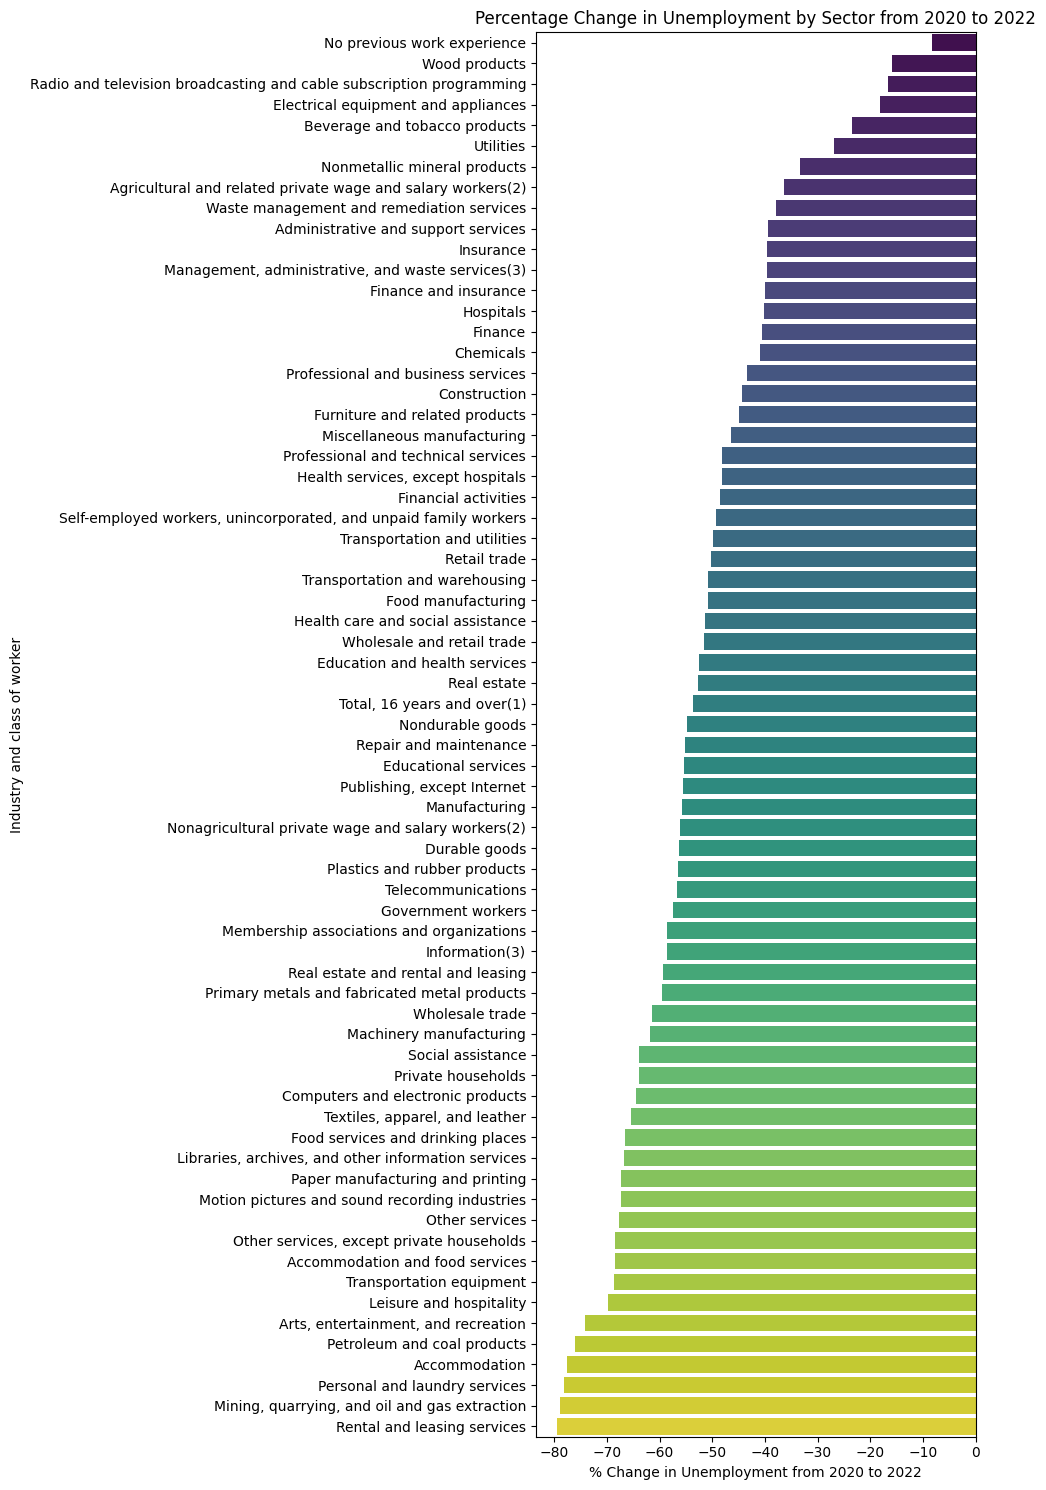

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/sample_data/2018to2022Unemploymentdata.xlsx'
data = pd.read_excel(file_path, skiprows=3)

data = data.dropna(subset=['Unnamed: 0'])
data = data.rename(columns={
    'Unnamed: 0': 'Industry and class of worker',
    'Unnamed: 1': 'Unemployed 2018',
    'Unnamed: 2': 'Unemployed 2019',
    'Unnamed: 3': 'Unemployed 2020',
    'Unnamed: 4': 'Unemployed 2021',
    'Unnamed: 5': 'Unemployed 2022',
})

columns_of_interest = ['Industry and class of worker', 'Unemployed 2018', 'Unemployed 2019', 'Unemployed 2020',
                       'Unemployed 2021', 'Unemployed 2022']
data = data[columns_of_interest]

data = data.reset_index(drop=True)

data['% Change 2020-2022'] = ((data['Unemployed 2022'] - data['Unemployed 2020']) / data['Unemployed 2020']) * 100

data_sorted = data.sort_values('% Change 2020-2022', ascending=False)

plt.figure(figsize=(10, 15))
sns.barplot(x='% Change 2020-2022', y='Industry and class of worker', data=data_sorted, palette='viridis')
plt.xlabel('% Change in Unemployment from 2020 to 2022')
plt.ylabel('Industry and class of worker')
plt.title('Percentage Change in Unemployment by Sector from 2020 to 2022')
plt.tight_layout()
plt.show()

## Visualization 10 Explanation:

At least two ML analyses on your dataset - along with a baseline comparison and an interpretation of the result that you obtain. Write the name of the member(s) who is responsible for it while explaining it.

# ADDITIONAL WORK

# Additional Visualization: Total Employment Values for all 21 Bureau of Labor Statistics Super Sectors from 2019 - 2022
## Group Member Responsible: Saahi Arumilli

In [ ]:
# Folder where data is stored for visualization 3
%cd "/content/drive/MyDrive/CS 418 - Project/Final Files/Saahi-Data-Files"
!pwd

/content/drive/MyDrive/CS 418 - Project/Final Files/Saahi-Data-Files
/content/drive/MyDrive/CS 418 - Project/Final Files/Saahi-Data-Files


In [ ]:
# Loading files needed for Visualization 3
# Member Responsible: Saahi Arumilli
## Read the files which hold the total employment for the years of 2019 - 2022 for all 21 super sectors

# Folder where data is stored for visualization 3
%cd "/content/drive/MyDrive/CS 418 - Project/Final Files/Saahi-Data-Files"
!pwd

construction = pd.read_csv('AllEmployeesConstructionTotal.csv')
durableGoods = pd.read_csv('AllEmployeesDurableGoodsTotal.csv')
financialActivities = pd.read_csv('AllEmployeesFinancialActivitiesTotal.csv')
goodsProducing = pd.read_csv('AllEmployeesGoodsProducingTotal.csv')
government = pd.read_csv('AllEmployeesGovernmentTotal.csv')
information = pd.read_csv('AllEmployeesInformationTotal.csv')
leisureHospitality = pd.read_csv('AllEmployeesLeisure&HospitalityTotal.csv')
manufacturing = pd.read_csv('AllEmployeesManufacturingTotal.csv')
miningLogging = pd.read_csv('AllEmployeesMining&LoggingTotal.csv')
nondurableGoods = pd.read_csv('AllEmployeesNonDurableGoodsTotal.csv')
otherServices = pd.read_csv('AllEmployeesOtherServicesTotal.csv')
privateServiceProviding = pd.read_csv('AllEmployeesPrivateServiceProvidingTotal.csv')
professionalBusinessService = pd.read_csv('AllEmployeesProfessional&BusinessServicesTotal.csv')
retailTrade = pd.read_csv('AllEmployeesRetailTradeTotal.csv')
serviceProviding = pd.read_csv('AllEmployeesServiceProvidingTotal.csv')
totalNonfarmTotal = pd.read_csv('AllEmployeesTotalNonFarmTotal.csv')
totalPrivate = pd.read_csv('AllEmployeesTotalPrivateTotal.csv')
tradeTransportationUtilities = pd.read_csv('AllEmployeesTradeTransportation&UtilitiesTotal.csv')
transportationWarehousing = pd.read_csv('AllEmployeesTransportation&WarehousingTotal.csv')
utils = pd.read_csv('AllEmployeesUtilitiesTotal.csv')
wholesale = pd.read_csv('AllEmployeesWholesaleTradeTotal.csv')

# Below lines will add another column indicating which super sector the data belongs to
construction.loc[:,'superSector'] = pd.Series('Construction', index=construction.index)
durableGoods.loc[:,'superSector'] = pd.Series('Durable Goods', index=durableGoods.index)
financialActivities.loc[:,'superSector'] = pd.Series('Financial Activities', index=financialActivities.index)
goodsProducing.loc[:,'superSector'] = pd.Series('Goods Producing', index=goodsProducing.index)
government.loc[:,'superSector'] = pd.Series('Government', index=government.index)
information.loc[:,'superSector'] = pd.Series('Information', index=information.index)
leisureHospitality.loc[:,'superSector'] = pd.Series('Leisure & Hospitality', index=leisureHospitality.index)
manufacturing.loc[:,'superSector'] = pd.Series('Manufacturing', index=manufacturing.index)
miningLogging.loc[:,'superSector'] = pd.Series('Mining & Logging', index=miningLogging.index)
nondurableGoods.loc[:,'superSector'] = pd.Series('Nondurable Goods', index=nondurableGoods.index)
otherServices.loc[:,'superSector'] = pd.Series('Other Services', index=otherServices.index)
privateServiceProviding.loc[:,'superSector'] = pd.Series('Private Service Providng', index=privateServiceProviding.index)
professionalBusinessService.loc[:,'superSector'] = pd.Series('Professional Business Services', index=professionalBusinessService.index)
retailTrade.loc[:,'superSector'] = pd.Series('Retail Trade', index=retailTrade.index)
serviceProviding.loc[:,'superSector'] = pd.Series('Service Providing', index=serviceProviding.index)
totalNonfarmTotal.loc[:,'superSector'] = pd.Series('Total Nonfarm', index=totalNonfarmTotal.index)
totalPrivate.loc[:,'superSector'] = pd.Series('Total Private', index=totalPrivate.index)
tradeTransportationUtilities.loc[:,'superSector'] = pd.Series('Trade, Transportation, & Utilities', index=tradeTransportationUtilities.index)
transportationWarehousing.loc[:,'superSector'] = pd.Series('Transportation & Warehousing', index=transportationWarehousing.index)
utils.loc[:,'superSector'] = pd.Series('Utilities', index=utils.index)
wholesale.loc[:,'superSector'] = pd.Series('Whole Sale', index=utils.index)


/content/drive/MyDrive/CS 418 - Project/Final Files/Saahi-Data-Files
/content/drive/MyDrive/CS 418 - Project/Final Files/Saahi-Data-Files


<Figure size 1000x800 with 0 Axes>

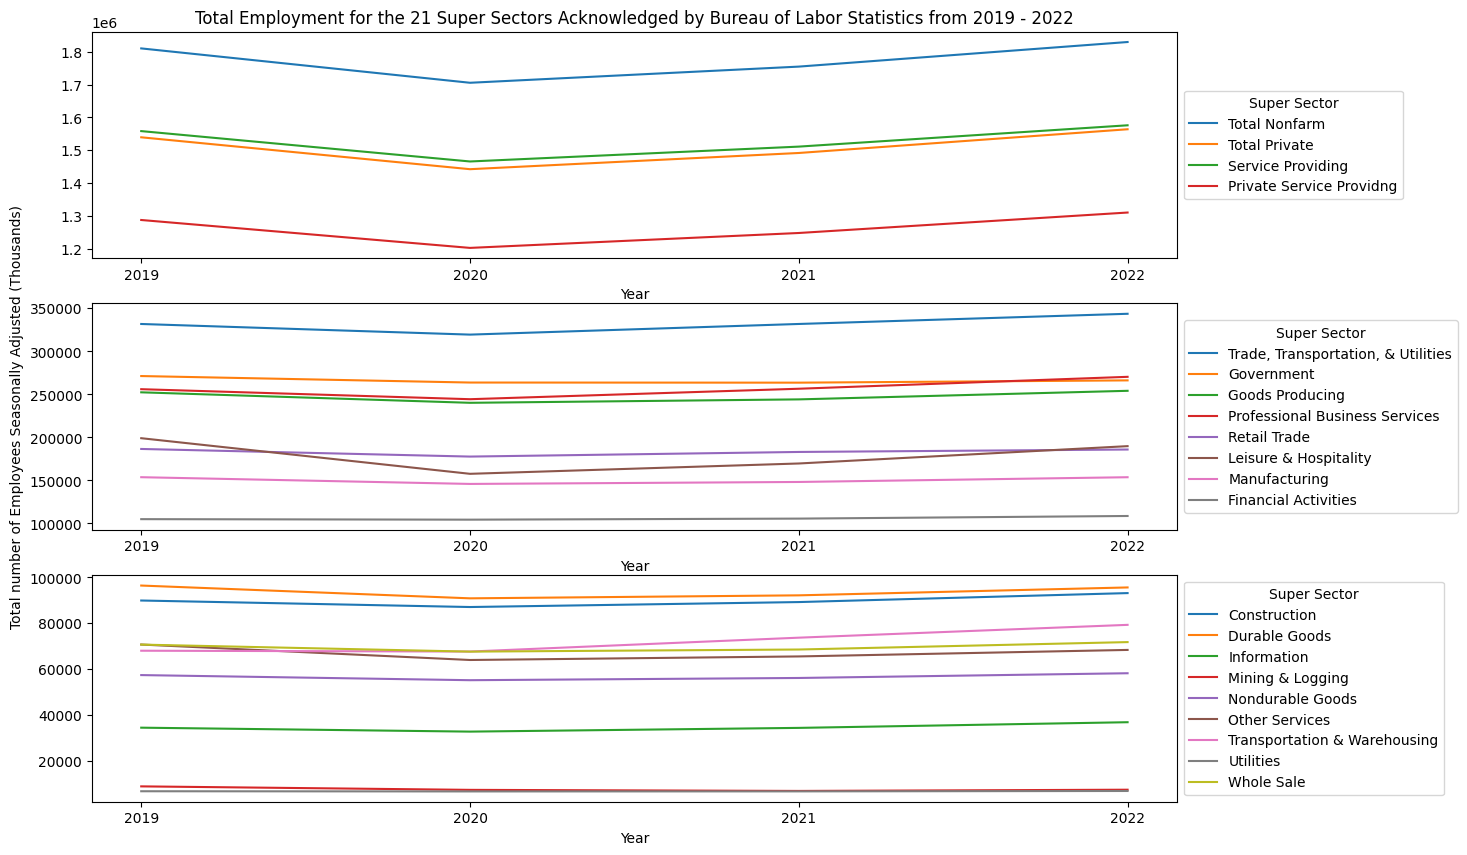

In [ ]:
# Visualization 3: Total Employment for the 21 Super Sectors Acknowloedged by the Bureau of Labor Statistics from 2019 - 2022 in Thousands
# Member Responsible: Saahi Arumilli
plt.figure(figsize=(10, 8))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

superFrame = [construction, durableGoods, financialActivities, goodsProducing, government, information, leisureHospitality, manufacturing,
              miningLogging, nondurableGoods, otherServices, privateServiceProviding, professionalBusinessService,
              retailTrade, serviceProviding, totalNonfarmTotal, totalPrivate, tradeTransportationUtilities, transportationWarehousing, utils, wholesale]
result = pd.concat(superFrame)

subFrameUpper = [totalNonfarmTotal, totalPrivate, serviceProviding, privateServiceProviding]
subFrameMiddle = [tradeTransportationUtilities, government, goodsProducing, professionalBusinessService, retailTrade, leisureHospitality, manufacturing, financialActivities]
subFrameLower = [construction, durableGoods, information, miningLogging, nondurableGoods, otherServices, transportationWarehousing, utils, wholesale]

upperResult = pd.concat(subFrameUpper)
middleResult = pd.concat(subFrameMiddle)
lowerResult = pd.concat(subFrameLower)

fig, axs = plt.subplots(3, figsize=(14,10))
upper = sns.lineplot(x='Year', y= 'Total', hue='superSector' , data=upperResult, ax=axs[0])
middle = sns.lineplot(x='Year', y='Total', hue='superSector', data=middleResult, ax=axs[1])
lower = sns.lineplot(x='Year', y='Total', hue='superSector', data=lowerResult, ax=axs[2])
upper.set(xlabel='Year', ylabel="", xticks=[2019, 2020, 2021, 2022], title= "Total Employment for the 21 Super Sectors Acknowledged by Bureau of Labor Statistics from 2019 - 2022")
middle.set(xlabel='Year', ylabel = "Total number of Employees Seasonally Adjusted (Thousands)", xticks=[2019, 2020, 2021, 2022])
lower.set(xlabel='Year', ylabel = "")
upper.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Super Sector')
middle.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Super Sector')
lower.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Super Sector')

plt.xticks([2019, 2020, 2021, 2022])
plt.show()

# Additional Visualization: Total Nonfarm Employment Seasonally Adjusted in the Top 10 Most Populous States in the US from 2019 - 2022
## Group Member Responsible: Saahi Arumilli

/content/drive/MyDrive/CS 418 - Project/Final Files/Saahi-Data-Files
/content/drive/MyDrive/CS 418 - Project/Final Files/Saahi-Data-Files


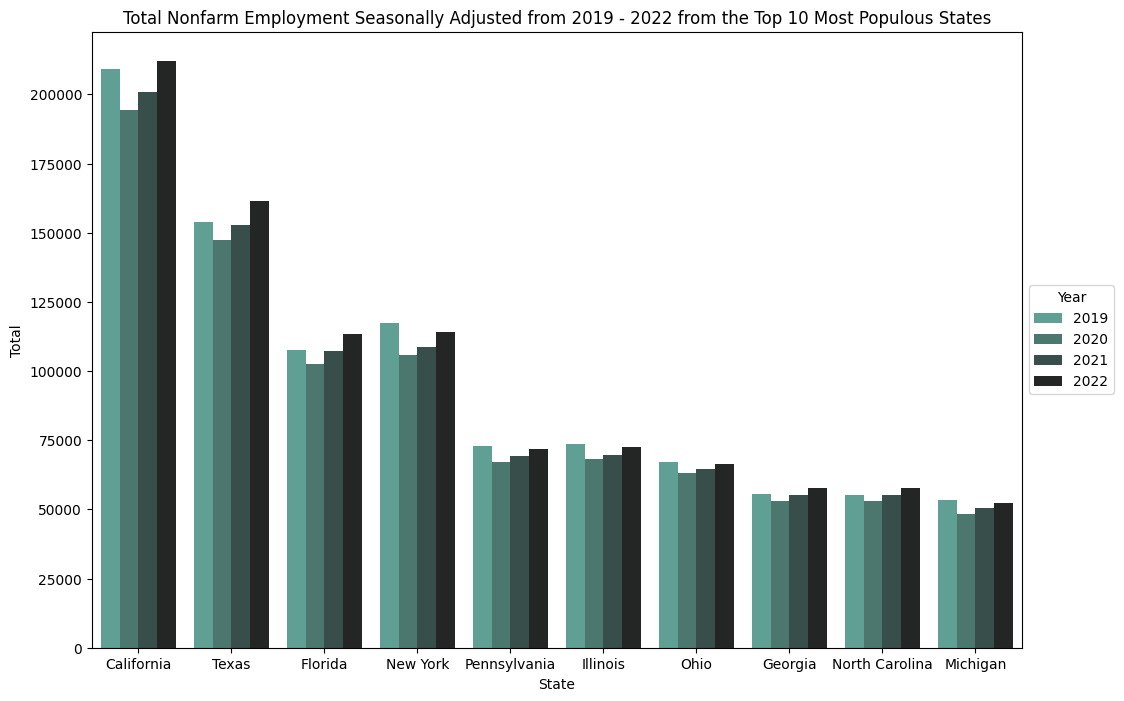

In [ ]:
# Visualization 6: Total Nonfarm Seasonally Adjusted Employment in the Top 10 Most Populous States in the US from 2019 - 2022
# Member Responsible: Saahi Arumilli

# Total Nonfarm Seasonally Adjusted Employment in the Top 10 Most Populous States in the US from 2019 - 2022
%cd "/content/drive/MyDrive/CS 418 - Project/Final Files/Saahi-Data-Files"
!pwd
# Employment from 2019 - 2022 in the top 10 most populous US states
# States were determined based on the following link: https://www.britannica.com/topic/largest-U-S-state-by-population

# Total Nonfarm Employment in Thousands Seasonally Adjusted For Top 10 Most Populous States Between 2019 - 2022
California = pd.read_csv('StateCaliforniaEmp.csv')
Texas = pd.read_csv('StateTexasEmp.csv')
Florida = pd.read_csv('StateFloridaEmp.csv')
NewYork = pd.read_csv('StateNewYorkEmp.csv')
Penn = pd.read_csv('StatePennEmp.csv')
Illinois = pd.read_csv('StateIllinoisEmp.csv')
Ohio = pd.read_csv('StateOhioEmp.csv')
Georgia = pd.read_csv('StateGeorgiaEmp.csv')
NorthCarolina = pd.read_csv('StateNorthCaroEmp.csv')
Michigan = pd.read_csv('StateMichiganEmp.csv')


California.loc[:, 'State'] = pd.Series('California', index=California.index)
Texas.loc[:, 'State'] = pd.Series('Texas', index=Texas.index)
Florida.loc[:, 'State'] = pd.Series('Florida', index=Florida.index)
NewYork.loc[:, 'State'] = pd.Series('New York', index=NewYork.index)
Penn.loc[:, 'State'] = pd.Series('Pennsylvania', index=Penn.index)
Illinois.loc[:, 'State'] = pd.Series('Illinois', index=Illinois.index)
Ohio.loc[:, 'State'] = pd.Series('Ohio', index=Ohio.index)
Georgia.loc[:, 'State'] = pd.Series('Georgia', index=Georgia.index)
NorthCarolina.loc[:, 'State'] = pd.Series('North Carolina', index=NorthCarolina.index)
Michigan.loc[:, 'State'] = pd.Series('Michigan', index=Michigan.index)
#print(Penn)
plt.figure(figsize=(12, 8))
stateFrame = [California, Texas, Florida, NewYork, Penn, Illinois, Ohio, Georgia, NorthCarolina, Michigan]
# Maybe each frame should be normaized by a factor

states = pd.concat(stateFrame)
states['Year'].astype(str)
#statePlot = sns.lineplot(x='Year', y='Total', hue='State', data=states)
#sns.boxplot(data=states, x="Total", y="Year", hue="Year")
statePlot = sns.barplot(data=states, x='State', y='Total', hue='Year', palette="dark:#5A9_r")
statePlot.set(title='Total Nonfarm Employment Seasonally Adjusted from 2019 - 2022 from the Top 10 Most Populous States')
statePlot.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Year')

## Visualization 6 Explination:
### This visualization shows the top 10 most populous states in the US and their total nonfarm employment between the years 2019 - 2022. From this we can see that only half of these important revenue producers have barely recovered to their pre pandemic levels of employment or have just barely surpassed. This is quite concerning as this data shows just how much of a compromising position the economy is in post pandemic.

#**MACHINE LEARNING ANALYSIS SECTION**

# ML Analysis 1: Predicting the City Of Chicago's Budget using Linear Regression
## Group Member Responsible: Saahi Arumilli

In [ ]:
# Group Member Responsible - Saahi Arumilli
# RESOURCES:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html //sklearn linear regression
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# Data from the Chicago Data Portal 2012 - 2023 budget recommendations - positions and salaries
#
# Navigate to the files
%cd "/content/drive/MyDrive/CS 418 - Project/Final Files/Saahi-Data-Files"
!pwd

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# 2012 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2012 = pd.read_csv('2012ChicagoBudget.csv')
Budget2012 = budget2012.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2012 = Budget2012.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2012 = Budget2012.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2012"})

# 2013 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2013 = pd.read_csv('2013ChicagoBudget.csv')
Budget2013 = budget2013.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2013 = Budget2013.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2013 = Budget2013.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2013"})

# 2014 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2014 = pd.read_csv('2014ChicagoBudget.csv')
Budget2014 = budget2014.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2014 = Budget2014.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2014 = Budget2014.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2014"})

# 2015 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2015 = pd.read_csv('2015ChicagoBudget.csv')
Budget2015 = budget2015.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2015 = Budget2015.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2015 = Budget2015.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2015"})


# 2016 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2016 = pd.read_csv('2016ChicagoBudget.csv')
Budget2016 = budget2016.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2016 = Budget2016.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2016 = Budget2016.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2016"})

# 2017 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2017 = pd.read_csv('2017ChicagoBudget.csv')
Budget2017 = budget2017.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2017 = Budget2017.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2017 = Budget2017.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2017"})


# 2018 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2018 = pd.read_csv('2018ChicagoBudget.csv')
Budget2018 = budget2018.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2018 = Budget2018.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2018 = Budget2018.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2018"})


# 2019 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2019 = pd.read_csv('2019ChicagoBudget.csv')
Budget2019 = budget2019.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2019 = Budget2019.loc[:, ['DEPARTMENT DESCRIPTION','TOTAL BUDGETED AMOUNT']]
Budget2019 = Budget2019.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2019"})


# 2020 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2020 = pd.read_csv('2020ChicagoBudget.csv')
Budget2020 = budget2020.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2020 = Budget2020.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2020 = Budget2020.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2020"})


# 2021 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2021 = pd.read_csv('2021ChicagoBudget.csv')
Budget2021 = budget2021.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2021 = Budget2021.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2021 = Budget2021.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2021", "DEPARTMENT DESCRIPTION": "DEPARTMENTS"})


# 2022 Data where total budget for departments will be hidden and those values will be used to test our classifer - - Data Source: Chicago Data Portal
# budget_2022 = pd.read_csv('2022ChicagoBudget.csv')
# budget2022 = budget_2022.loc[:, ['DEPARTMENT DESCRIPTION', 'TITLE DESCRIPTION']]
# hiddenSalaries = budget_2022.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]

budget2022 = pd.read_csv('2022ChicagoBudget.csv')
Budget2022 = budget2022.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2022 = Budget2022.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2022 = Budget2022.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2022", "DEPARTMENT DESCRIPTION": "DEPARTMENTS"})


# 2023 Budget Information For Chicago - Data Source: Chicago Data Portal
budget2023 = pd.read_csv('2023ChicagoBudget.csv')
Budget2023 = budget2023.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2023 = Budget2023.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2023 = Budget2023.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2023", "DEPARTMENT DESCRIPTION": "DEPARTMENTS"})

# print((budget2021['DEPARTMENT DESCRIPTION'].nunique())) # 36 departments are shown in this data
# print((budget2021['DEPARTMENT DESCRIPTION'].unique()))
merged_years = pd.concat([Budget2021, Budget2020, Budget2019, Budget2018], axis=1)
merged_years = merged_years.drop(['DEPARTMENT DESCRIPTION'], axis=1)

# print(merged_years)

# Use the total budgeted value for each year starting from 2018 to build a linear regression model to predict the buget for 2024 then using the existing data from 2024 figure out how accurate our model was
Budgets2015 = budget2015['TOTAL BUDGETED AMOUNT'].sum()
Budgets2014 = budget2014['TOTAL BUDGETED AMOUNT'].sum()
Budgets2013 = budget2013['TOTAL BUDGETED AMOUNT'].sum()
Budgets2012 = budget2012['TOTAL BUDGETED AMOUNT'].sum()

Budgets2017 = budget2017['TOTAL BUDGETED AMOUNT'].sum()
Budgets2016 = budget2016['TOTAL BUDGETED AMOUNT'].sum()

Budgets2018 = budget2018['TOTAL BUDGETED AMOUNT'].sum()
Budgets2019 = budget2019['TOTAL BUDGETED AMOUNT'].sum()
Budgets2020 = budget2020['TOTAL BUDGETED AMOUNT'].sum()
Budgets2021 = budget2021['TOTAL BUDGETED AMOUNT'].sum()

totalBudgetData = {'Total Budget': [Budgets2012, Budgets2013, Budgets2014, Budgets2015, Budgets2016, Budgets2017, Budgets2018, Budgets2019, Budgets2020, Budgets2021], 'Year' : [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]}
TotalBudgetFrame = pd.DataFrame(data=totalBudgetData, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TotalBudgetFrame.head()

# Year is the independent variable the salary is dependant.
regression = LinearRegression().fit(TotalBudgetFrame['Year'].values.reshape(-1, 1), TotalBudgetFrame['Total Budget'])
print(regression)
regressionScore = regression.score(TotalBudgetFrame['Year'].values.reshape(-1, 1), TotalBudgetFrame['Total Budget'])
print("\nLinear Regression Coefficient Score: ", regressionScore)
print("This suggests that there is a strong positive correlation as the years keep going the overall buget to run the city is increasing")
predictedBudgetFor2022 = regression.predict(np.array([[2022]]))
predictedBudgetFor2023 = regression.predict(np.array([[2023]]))
#print(predictedBudgetFor2022, predictedBudgetFor2023)
Budgets2022 = budget2022['TOTAL BUDGETED AMOUNT'].sum()
Budgets2023 = budget2023['TOTAL BUDGETED AMOUNT'].sum()
#print(Budgets2022, Budgets2023)

print("\nFrom the below values we can see that our linear regression prediction model does under report the budget for the \npredicted years but they are only off by about a hundred million or so")
print("The Budget for 2022: ", Budgets2022, " The Predicted Budget for 2022: ", predictedBudgetFor2022[0])
print("The Budget for 2023: ", Budgets2023, " The Predicted Budget for 2023: ", predictedBudgetFor2023[0])


/content/drive/MyDrive/CS 418 - Project/Final Files/Saahi-Data-Files
/content/drive/MyDrive/CS 418 - Project/Final Files/Saahi-Data-Files
LinearRegression()

Linear Regression Coefficient Score:  0.9674431578517175
This suggests that there is a strong positive correlation as the years keep going the overall buget to run the city is increasing

From the below values we can see that our linear regression prediction model does under report the budget for the 
predicted years but they are only off by about a hundred million or so
The Budget for 2022:  3393276423.0  The Predicted Budget for 2022:  3281116314.533325
The Budget for 2023:  3522920659.0  The Predicted Budget for 2023:  3352232500.84848


## ML Analysis 1 Explination:
#### This Machine Learning Analysis was done using data from the Chicago Data Portal, specifically the city's buget recommendations from the years of 2012 - 2021. The years 2022 and 2023 were used for predictions and comparing if the real values were accurately matching to the predicted values. Essentially using the model we can predict the trends of future budgets and can even pivot to specific sectors.

#### The model I have created has a very strong positive correlation as the regression score value is 0.967. However, the predictions I made for 2022 and 2023 were a bit lower than the acutal budget for both years respectively. Roughly my predictor was short by about a hundred million dollars.

#### This model can be applied to various states and even to specific jobs and we hope that by looking at these predictions we can find trends on overall employment and quality of employment. We saw a positive trend in the overall budget which leads us to believe that many of the jobs that are taken into account in this data have seen siginificant salary increases throughout the years.

# ML Analysis 2 -
## Group Member Responsible: Brian Li

In [ ]:
%cd './Final Files'
!pwd

/content/drive/.shortcut-targets-by-id/1vHUQNFw7whQPPjPmJSEVvPrI2ThZlcZ3/CS 418 - Project/Final Files
/content/drive/.shortcut-targets-by-id/1vHUQNFw7whQPPjPmJSEVvPrI2ThZlcZ3/CS 418 - Project/Final Files


In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import Ridge

In [ ]:
nat2019 = pd.read_csv('national_M2019_dl.csv')
nat2019.columns = nat2019.columns.str.lower()
condition = nat2019['occ_code'].str[-4:] == '0000'
nat2019 = nat2019[condition]
nat2019 = nat2019[['occ_title', 'tot_emp', 'h_mean', 'a_mean', 'a_pct10', 'a_pct25', 'a_median', 'a_pct75', 'a_pct90']]
nat2019['occ_title'] = nat2019['occ_title'].str.replace(' Occupations', '')
nat2019 = nat2019.drop(index = 0)
for column in nat2019.columns:
    nat2019[column] = nat2019[column].str.replace(',', '')
    nat2019[column] = nat2019[column].str.replace('#', '0')
    if (column != 'occ_title'):
        nat2019[column] = nat2019[column].astype(float)

nat2020 = pd.read_csv('national_M2020_dl.csv')
nat2020.columns = nat2020.columns.str.lower()
condition = nat2020['occ_code'].str[-4:] == '0000'
nat2020 = nat2020[condition]
nat2020 = nat2020[['occ_title', 'tot_emp', 'h_mean', 'a_mean', 'a_pct10', 'a_pct25', 'a_median', 'a_pct75', 'a_pct90']]
nat2020['occ_title'] = nat2020['occ_title'].str.replace(' Occupations', '')
nat2020 = nat2020.drop(index = 0)
for column in nat2020.columns:
    nat2020[column] = nat2020[column].str.replace(',', '')
    nat2020[column] = nat2020[column].str.replace('#', '0')
    if (column != 'occ_title'):
        nat2020[column] = nat2020[column].astype(float)

X = nat2019[['a_pct10', 'a_pct25', 'a_pct75', 'a_mean']]
Y = nat2019['a_median']



X_test = nat2020[['a_pct10', 'a_pct25', 'a_pct75', 'a_mean']]
y_test = nat2020['a_median']

model = Ridge(alpha=1.0)
model.fit(X, Y)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
print("Mean squared error: ", mse)

print(model.coef_)








Mean squared error:  884916.6704787043
[-1.5668052   2.24431453  0.40060401 -0.36501617]


## ML Analysis 2 Explanation: This analysis performs a ridge regression on the annual salaries to predict the median salary. It uses the 2019 data as training data, and uses the 2020 data as test data. Overall this analysis shows that there is not much correlation between salary and who was let go. Although from the data alone, we can see that people in the lower wage percentile are more likely to lose their job.

# ML Analysis 3: Predicting Changes in Overtime Billing
## Group Member Responsible: Saahil Sorakayala

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn
import scipy
from scipy import stats
import string
import re # helps you filter urls
from IPython.display import display, Latex, Markdown

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# ML Analysis 1: Predicting Changes in Overtime Billing
# Member Responsible: Saahil Sorakayala
%cd "/content/drive/MyDrive/CS 418 - Project"
!pwd

over2020_data = pd.read_csv('Employee_Overtime_and_Supplemental_Earnings_2020_20240223.csv')

over2022_data = pd.read_csv('Employee_Overtime_and_Supplemental_Earnings_2022_20240223.csv')
over2022_data['DEPARTMENT NAME'] = over2022_data['DEPARTMENT NAME'].str.upper()

# Convert department names to uppercase for consistency
over2022_data['DEPARTMENT NAME'] = over2022_data['DEPARTMENT NAME'].str.upper()

# Aggregate total overtime billed for each department in 2020 and 2022
over2020_total = over2020_data.groupby('DEPARTMENT NAME')['TOTAL'].sum().reset_index()
over2022_total = over2022_data.groupby('DEPARTMENT NAME')['TOTAL'].sum().reset_index()

# Merge the total overtime data for 2020 and 2022
merged_data = pd.merge(over2020_total, over2022_total, on='DEPARTMENT NAME', suffixes=('_2020', '_2022'))

# Calculate the difference in total overtime between 2020 and 2022
merged_data['Overtime Change'] = merged_data['TOTAL_2022'] - merged_data['TOTAL_2020']

# If the difference is positive, the target variable is set to 1, indicating an increase in overtime billing
# If the difference is 0 or negative, the target variable is set to 0, indicating no increase or a decrease in overtime billing.
merged_data['Label'] = np.where(merged_data['Overtime Change'] > 0, 1, 0)

# Get the features and labels
X = merged_data[['Overtime Change']]  # Features: Difference in total overtime billing between 2020 and 2022
y = merged_data['Label']  # Target variable: Increase or decrease in total overtime billing

# display(merged_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#############################################################################################################################################
print("-------------------------------------------------------------")
print("Training with Linear Regression Model")
# Train the Linear Regression model
linearclf = LinearRegression()
linearclf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = linearclf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Coefficients and Intercept
coefficients = linearclf.coef_
intercept = linearclf.intercept_
print("\nCoefficients:", coefficients)
print("Intercept:", intercept)

print("-------------------------------------------------------------")
#############################################################################################################################################
print("Training with Logistic Regression Model")
# Train the Logistic Regression model
logisticclf = LogisticRegression(random_state=42)
logisticclf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logisticclf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Coefficients
coefficients = logisticclf.coef_[0]
intercept = logisticclf.intercept_[0]
print("\nCoefficients:", coefficients)
print("Intercept:", intercept)
print()

print("-------------------------------------------------------------")
#############################################################################################################################################
print("Training with SVC")
# Initialize SVM classifier
clf = SVC(kernel='linear', random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/content/drive/MyDrive/CS 418 - Project
/content/drive/MyDrive/CS 418 - Project
-------------------------------------------------------------
Training with Linear Regression Model
Mean Squared Error: 0.2310986924713772
R-squared: 0.03708878136926186

Coefficients: [3.54520935e-08]
Intercept: 0.6181193961534278
-------------------------------------------------------------
Training with Logistic Regression Model
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Coefficients: [0.0175446]
Intercept: 8.835222524502319e-05

-------------------------------------------------------------
Training with SVC
Accuracy: 0.8

Classification Report:
              precision    recall  f1-sco

## ML Analysis 3 Explanation:

The logistic regression model was the most effective, since it had 1.0 for both accuracy and precision, meaning it could accurately classify whether there was an increase or decrease in overtime billing. This accuracy is crucial for decision-making regarding resource allocation or budget planning because one can tell where the deficits are and provide more support to those departments.

The SVM model, while achieving a respectable accuracy of 0.8, exhibits some imprecision in predicting decreases in overtime billing. This could lead to potential misallocations of resources if it was the only model relied upon.

The linear regression model's poor performance suggests it is unsuitable for predicting changes in overtime billing accurately. This is shown by a high mean squared error and a low R-squared value. Thus, the logistic regression model stands out as the optimal choice for this specific problem, offering accurate and reliable predictions crucial for effective resource planning amidst fluctuating overtime demands.

# ML Analysis 4: (Insert Title)
## Group Member Responsible: Michelle Zhou

In [ ]:
# ML Analysis 2: Predicting Overtime Costs for Chicago City Departments
# Member Responsible: Michelle Zhou

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Added code from above to make cell work
chi_data = pd.read_csv('Chicago_City_Employment_Data_20240223.csv')
over2020_data = pd.read_csv('Employee_Overtime_and_Supplemental_Earnings_2020_20240223.csv')

over2022_data = pd.read_csv('Employee_Overtime_and_Supplemental_Earnings_2022_20240223.csv')
over2022_data['DEPARTMENT NAME'] = over2022_data['DEPARTMENT NAME'].str.upper()

over2022_data.rename(columns={'TOTAL': 'Average Rate 2022'}, inplace=True)
over2020_data.rename(columns={'TOTAL': 'Average Rate 2020'}, inplace=True)

# Data Concatenation
plt.figure(figsize=(12, 12))
otFrame = [over2020_data, over2022_data]

resultFrame = pd.concat(otFrame)
resultFrame.head()

# print(len(over2020_data.axes[0]))
# print(len(over2022_data.axes[0]))
# print(len(resultFrame.axes[0]))
resultFrame.columns
melted_data = pd.melt(resultFrame, id_vars=['DEPARTMENT NAME'], value_vars=['Average Rate 2020', 'Average Rate 2022'], var_name='Overtime Year', value_name='Average Overtime Rate')

X = resultFrame[['DEPARTMENT NAME', 'Overtime Year']]
X = pd.get_dummies(X)
y = resultFrame['Average Overtime Rate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Linear Regression):", mse)

KeyError: "['Overtime Year'] not in index"

<Figure size 1200x1200 with 0 Axes>

## ML Analysis 4 Explanation:

# ML Analysis 5: ENTER TITLE
## Group Member Responsible: Dawid Biel

/content/drive/MyDrive/CS 418 - Project
/content/drive/MyDrive/CS 418 - Project


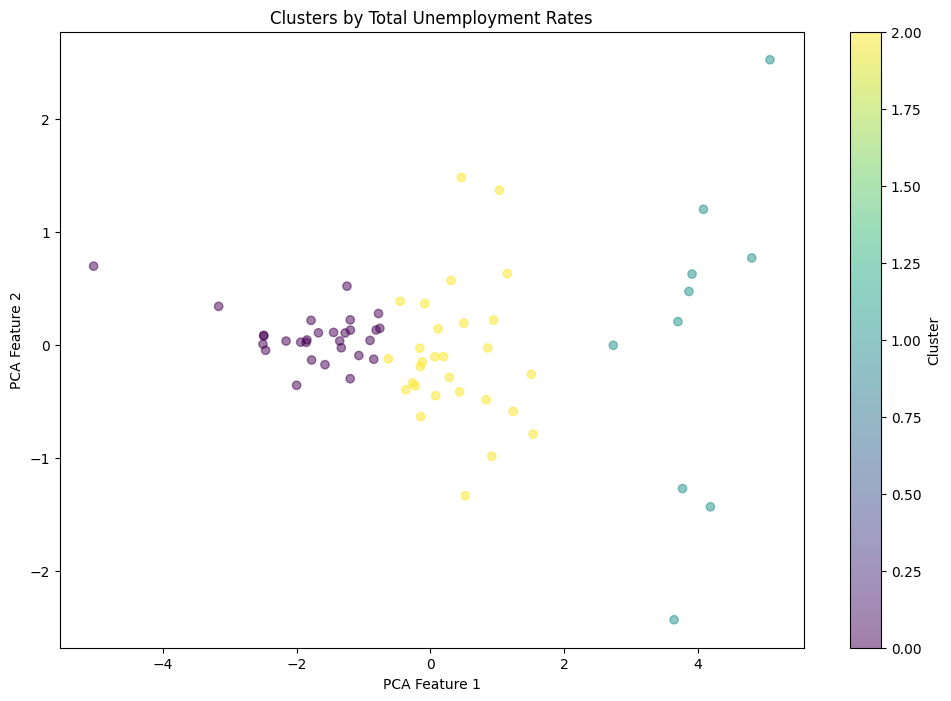

Industries in Cluster 0:
['Durable goods', 'Primary metals and fabricated metal products', 'Machinery manufacturing', 'Computers and electronic products', 'Transportation equipment', 'Wood products', 'Beverage and tobacco products', 'Paper manufacturing and printing', 'Chemicals', 'Wholesale trade', 'Utilities', 'Radio and television broadcasting and cable subscription programming', 'Telecommunications', 'Libraries, archives, and other information services', 'Financial activities', 'Finance and insurance', 'Finance', 'Insurance', 'Real estate and rental and leasing', 'Real estate', 'Professional and technical services', 'Education and health services', 'Health care and social assistance', 'Hospitals', 'Health services, except hospitals', 'Membership associations and organizations', 'Government workers', 'Self-employed workers, unincorporated, and unpaid family workers', 'No previous work experience']

Industries in Cluster 1:
['Motion pictures and sound recording industries', 'Manageme

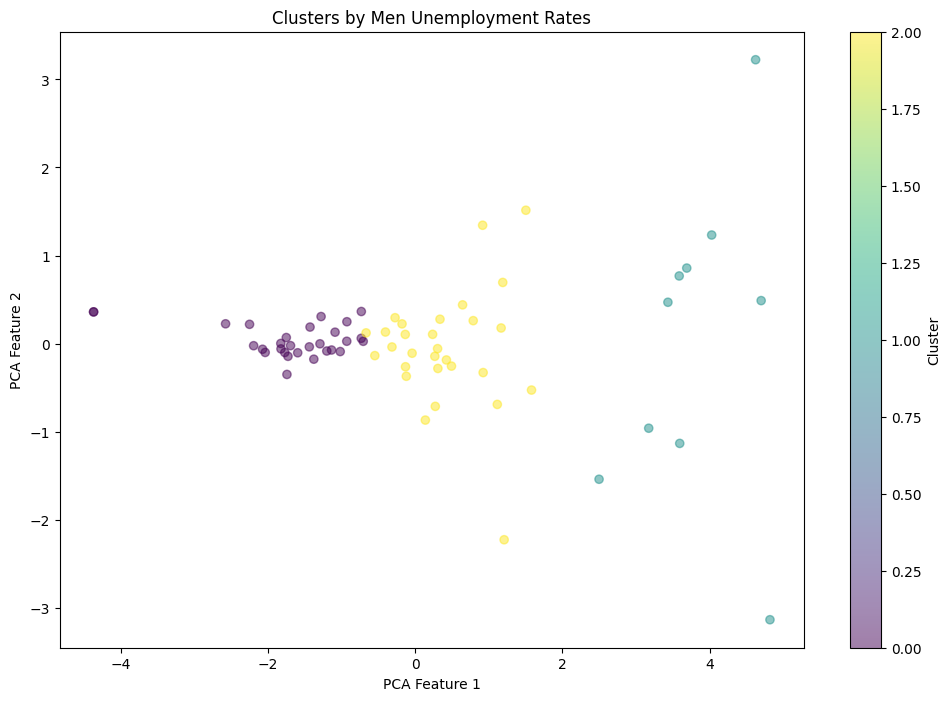

Industries in Cluster 0:
['Manufacturing', 'Durable goods', 'Primary metals and fabricated metal products', 'Machinery manufacturing', 'Computers and electronic products', 'Electrical equipment and appliances', 'Transportation equipment', 'Beverage and tobacco products', 'Paper manufacturing and printing', 'Chemicals', 'Wholesale trade', 'Utilities', 'Radio and television broadcasting and cable subscription programming', 'Telecommunications', 'Libraries, archives, and other information services', 'Financial activities', 'Finance and insurance', 'Finance', 'Insurance', 'Real estate and rental and leasing', 'Real estate', 'Professional and technical services', 'Education and health services', 'Health care and social assistance', 'Hospitals', 'Health services, except hospitals', 'Membership associations and organizations', 'Government workers', 'No previous work experience']

Industries in Cluster 1:
['Motion pictures and sound recording industries', 'Management, administrative, and waste

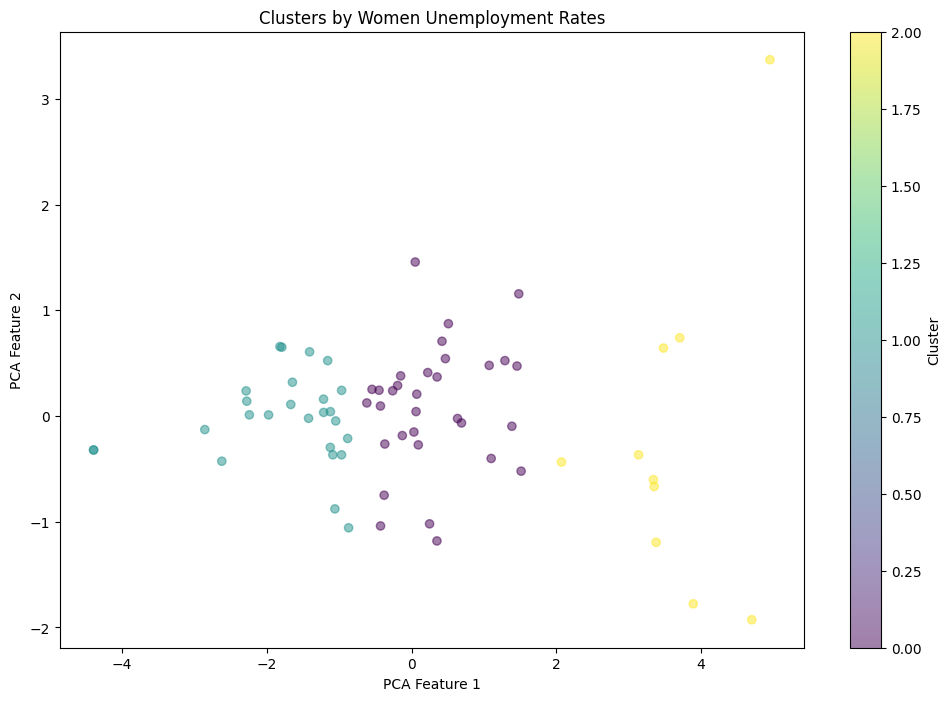

Industries in Cluster 0:
['Total, 16 years and over(1)', 'Nonagricultural private wage and salary workers(2)', 'Construction', 'Manufacturing', 'Durable goods', 'Electrical equipment and appliances', 'Transportation equipment', 'Furniture and related products', 'Miscellaneous manufacturing', 'Nondurable goods', 'Food manufacturing', 'Beverage and tobacco products', 'Textiles, apparel, and leather', 'Paper manufacturing and printing', 'Plastics and rubber products', 'Wholesale and retail trade', 'Wholesale trade', 'Retail trade', 'Transportation and utilities', 'Transportation and warehousing', 'Information(3)', 'Publishing, except Internet', 'Radio and television broadcasting and cable subscription programming', 'Rental and leasing services', 'Professional and business services', 'Waste management and remediation services', 'Educational services', 'Social assistance', 'Other services', 'Other services, except private households', 'Repair and maintenance', 'Personal and laundry services

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def clean_non_numeric(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col].replace('–', np.nan), errors='coerce')
    return df

# file_path = '/content/sample_data/2018to2022UnemploymentdataML.xlsx'

%cd "/content/drive/MyDrive/CS 418 - Project"
!pwd
data = pd.read_excel('2018to2022UnemploymentdataML.xlsx')


unemployment_rate_cols = ['2022 Unemployment rate', '2021 Unemployment rate', '2020 Unemployment rate', '2019 Unemployment rate', '2018 Unemployment rate']
men_cols = ['2022 Men', '2021 Men', '2020 Men', '2019 Men', '2018 Men']
women_cols = ['2022 Women', '2021 Women', '2020 Women', '2019 Women', '2018 Women']
industry_column_name = 'Industry and class of worker'

data = clean_non_numeric(data, unemployment_rate_cols + men_cols + women_cols)
data.fillna(0, inplace=True)

scaler = StandardScaler()
total_unemployment_scaled = scaler.fit_transform(data[unemployment_rate_cols])
men_unemployment_scaled = scaler.fit_transform(data[men_cols])
women_unemployment_scaled = scaler.fit_transform(data[women_cols])

kmeans_total = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_total = kmeans_total.fit_predict(total_unemployment_scaled)

kmeans_men = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_men = kmeans_men.fit_predict(men_unemployment_scaled)

kmeans_women = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_women = kmeans_women.fit_predict(women_unemployment_scaled)

def plot_clusters_with_labels(data, scaled_data, clusters, title):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_data)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', alpha=0.5)



    plt.title(title)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.colorbar(scatter, label='Cluster')
    plt.show()

    for cluster in range(np.max(clusters) + 1):
        print(f"Industries in Cluster {cluster}:")
        industries_in_cluster = data.loc[clusters == cluster, industry_column_name]
        print(industries_in_cluster.to_list())
        print()

plot_clusters_with_labels(data, total_unemployment_scaled, clusters_total, 'Clusters by Total Unemployment Rates')
plot_clusters_with_labels(data, men_unemployment_scaled, clusters_men, 'Clusters by Men Unemployment Rates')
plot_clusters_with_labels(data, women_unemployment_scaled, clusters_women, 'Clusters by Women Unemployment Rates')

## ML Analysis 5 Explanation:

# Reflection: a discussion on the following aspects:


*   What is the most challenging part of the project that you’ve encountered so far?
>> Answer: The most challenging aspect of the project we have encountered is cleaning the data. In the data from visualization 2 from the Bureau of Labor Statistics, it took a while to remove additional headers that were automatically added to the data files. We had 21 supersector files and additional subsector files where we had to clean the data and transform from an xlsx to csv



*   What are your initial insights?
>> Answer: Almost all sectors within the US took a substantial hit during the pandemic. However there were a few sectors such as "Professional Business Services" and "Transportation & Warehousing" that grew by a substantial amount compared to their 2019 levels.


*   Are there any concrete results you can show at this point? If not, why not?
>> Answer: Not as of yet. We have mainly looked at which sectors were able to recover in terms of annual employment. For the most part, the supersectors were able to return to or outgrow their 2019 levels by 2022. We have looked into these supersectors and their subsectors to see learn more about them.


*   Going forward, what are the current biggest problems you’re facing?
>> Answer: One of the biggest problems we will face is the sheer volume of data that we can pull from data sources. This is largely due to the overall scope of our project being the entire United States. We will need to cross check what data we are pulling with its relevance to our hypothesis to make sure we are indeed using data that pertains to our overall question.



*   Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
>> Answer: We do believe we are on track with our project. We are confident we can accomplish more than the required requirements for this project. And by doing so we believe we can make substantial gains in answering the over arching question.
 On that note we will need to still put a lot of thought and time into data selection and making visualizationa and analyses that provide us with representative metrics and predictions.


*   Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?
>> Answer: It is definetly worth proceeding with our project because we are finding certain sectors where job growth is being hampered by both the pandemic and other external factors. One example we saw was Leisure and Hospitality. This national super sector still hasn't even gotten back to the pre pandemic level of employment.

* Next Step: Concrete plans and goals for the next month

>> Answer: We want to work on obtaining more data pertaining to our project maybe from a couple populous states to increase the robustness of our findings. By looking at cities like Chicago and states like California we can see if the national trends are applicable to the state level and vice versa.